In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
load_libs()
# set_chinese_font()

# 1. Data Wrangling

In [2]:
data = []
for year in range(2008,2018):
    file = "./data/cn/movie_%s.json" % year
    with open(file, encoding='utf-8' ) as data_file:    
        data += json.load(data_file)

In [3]:
df = pd.DataFrame(data)
df.describe()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
count,2468,2468,2468,2468,2468,2468,2468,2468,2468,2468,2468,2468
unique,728,411,580,511,373,1738,2446,72,2202,2443,2443,24
top,0.4%,3.7%,0.0%,0.0%,3.1%,,https://img3.doubanio.com/view/movie_poster_co...,5.9,137,白幽灵传奇之绝命逃亡 Outcast,https://movie.douban.com/subject/10810270/,2015
freq,49,16,17,65,38,713,2,64,6,2,2,347


In [4]:
df.head()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
0,2.2%,24.4%,46.7%,17.8%,8.9%,tt0904013,https://img3.doubanio.com/view/movie_poster_co...,6.1,59,笨裁妙判 糊涂神判,https://movie.douban.com/subject/2596658/,2007
1,4.1%,18.4%,56.8%,17.1%,3.6%,tt1151318,https://img3.doubanio.com/view/movie_poster_co...,6.0,8730,错爱 塚愛,https://movie.douban.com/subject/2361528/,2007
2,6.4%,23.0%,49.1%,17.5%,4.1%,tt1606322,https://img3.doubanio.com/view/movie_poster_co...,5.8,2618,救我,https://movie.douban.com/subject/5155783/,2008
3,6.6%,10.1%,53.0%,21.7%,8.6%,,https://img1.doubanio.com/view/movie_poster_co...,6.3,291,欣月童话,https://movie.douban.com/subject/2277015/,2008
4,2.3%,11.2%,47.4%,31.6%,7.5%,tt0491044,https://img1.doubanio.com/view/movie_poster_co...,6.6,34533,文雀,https://movie.douban.com/subject/2976123/,2008


In [5]:
df.drop_duplicates('title', inplace=True)
df['rating'] = df['rating'].astype(float)
df['ratings_num'] = df['ratings_num'].astype(int)
df['year'] = df['year'].astype(int)
df['1_star'] = df['1_star'].apply(lambda x: float(x.strip('%'))/100)
df['2_star'] = df['2_star'].apply(lambda x: float(x.strip('%'))/100)
df['3_star'] = df['3_star'].apply(lambda x: float(x.strip('%'))/100)
df['4_star'] = df['4_star'].apply(lambda x: float(x.strip('%'))/100)
df['5_star'] = df['5_star'].apply(lambda x: float(x.strip('%'))/100)

df.rename(columns={'title': 'name', 'rating': 'db_rating', 'ratings_num': 'db_ratings_count',   
                   'url': 'douban_url', 'img_url':'image_url', 'imdb_id': 'movie_tt_id'}, inplace=True)

In [6]:
def name_to_rating(name):
    return {
        '1_star': 2,
        '2_star': 4,
        '3_star': 6,
        '4_star': 8,
        '5_star': 10,
    }[name]

df['mode']=df[['1_star', '2_star','3_star','4_star','5_star']].idxmax(axis=1)
df['mode']=df['mode'].apply(lambda x: name_to_rating(x))

In [7]:
df['std']=(df['1_star']*(2-df['db_rating'])**2+df['2_star']*(4-df['db_rating'])**2+df['3_star']*(6-df['db_rating'])**2+ \
df['4_star']*(8-df['db_rating'])**2+df['5_star']*(10-df['db_rating'])**2)**0.5

# Deviation against mode
df['std2']=(df['1_star']*(2-df['mode'])**2+df['2_star']*(4-df['mode'])**2+df['3_star']*(6-df['mode'])**2+ \
df['4_star']*(8-df['mode'])**2+df['5_star']*(10-df['mode'])**2)**0.5

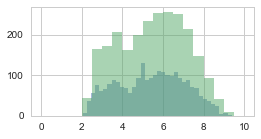

In [8]:
bins=linspace(0,10)
df['db_rating'].hist(bins=bins, alpha=0.5)

bins=arange(0,10,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))

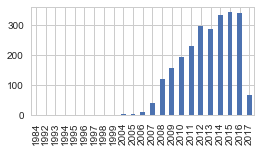

In [9]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

# 2. General Movies

In [10]:
df = df.query("db_ratings_count > 5000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,year,mode,std,std2
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.094884,0.155003,0.371060,0.262504,0.116558,6.301113,70567.548490,2012.283784,6.193959,1.768446,1.932710
std,0.147744,0.114153,0.133562,0.149926,0.115227,1.334482,85025.582558,3.105630,1.805295,0.237871,0.385548
min,0.001000,0.003000,0.012000,0.004000,0.008000,2.300000,5005.000000,1984.000000,2.000000,1.168114,1.209959
25%,0.010000,0.050000,0.274000,0.130000,0.039000,5.400000,14378.250000,2010.000000,6.000000,1.605210,1.697056
50%,0.029500,0.131000,0.394000,0.255000,0.074000,6.400000,38524.500000,2013.000000,6.000000,1.735798,1.851486
75%,0.101750,0.248750,0.482000,0.401750,0.152750,7.300000,93016.000000,2015.000000,8.000000,1.891983,2.042547
max,0.942000,0.424000,0.619000,0.582000,0.676000,9.200000,709045.000000,2017.000000,10.000000,3.397793,5.154028


## 2.1 Overview

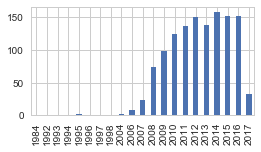

In [11]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

In [12]:
df['std'].hist(bins=20, alpha=0.5, figsize=(4,2))
plt_configure(title='STD distribution')

plt.figure()
bins=arange(0,10.5,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))
plt.gca().set_xlim([2, 10])
plt_configure(title='Rating distribution')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQsAAACZCAYAAAA4jB+uAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEXBJREFUeJzt3XtMk1cfB/BvAavYlqm7ilgVBR2C0tXocK8gXlbnZd4x
4HDTRCNTETXOIuAlkqEy3RRRh9cEYhxDZermjCiRqQO3ztskTEcWIkIceHlnq6Mqz/uH7zoqBU4R
adHvJzGxz3kuvx7L13OeS5FJkiSBiKgBLo4ugIhaBoYFEQlhWBCREIYFEQlhWBCREIYFEQlhWDSD
hw8fIi0tDTqdDv7+/ggKCsLChQtRUlICACgtLUXPnj3r/QMAer3eapm/vz+GDBmC5ORk3L9/366a
oqOjodfrAQD79+/HgAEDhLYrKipCfn5+ne0FBQXo2bMnTCYTAKBnz57Izc21q7aaSktLkZOTY3k9
ZMgQZGRkNHp/1Hhuji7gRbB+/Xrk5OQgLi4O3bt3x61bt5CamoqpU6fiu+++Q8eOHXHq1CnL+gkJ
CWjTpg3i4uJq7Ss0NBSrVq0CAPz9998oKipCUlISrly5grS0NMhkMrvrGzlyJEJCQoTW/fjjjzFj
xgy8/fbbNts1Gg1OnTqFtm3b2l2HLbGxsfD398ewYcMAAFlZWXB3d2+SfZN9GBbNYN++fVi6dKnl
B9LLywtffPEFBg4ciJycHEyYMAGvvvqqZX25XI42bdpYLavZVnN5586d0blzZ4wfPx4nTpzA0KFD
7a6vTZs2aNOmTSPeWW1P1tfUOnTo8Mz2TfXjNKQZyGQy5Ofn4+HDh5Zl7u7uyM7OxvDhw596/716
9YJWq8XRo0frXOefY/Xt2xexsbEwm82WtienIampqQgJCUFAQADGjRuHkydPAgAiIyNx/fp1rFq1
CpGRkZbp0+bNm9G/f3/MnDmz1jQEAC5evIgxY8YgICAAkZGRKC4utrQ9OU2pub1er8fZs2exc+dO
DBkyBID1NESSJGRkZECn0yEgIABjx4611Ao8nratWLECer0eGo0GQUFBSE1NbWw3v/AYFs1gxowZ
2L9/P0JCQqDX63HgwAFUVlaiS5cuUKlUTXIMHx8f/P777zbb8vPzERcXh+nTp+PAgQNQqVR1nkfI
ycnBjh07kJSUhCNHjiAkJAQxMTEwGo1ISUnBG2+8gYULFyIlJcWyTV5eHjIzM/HJJ5/Y3Gd6ejrm
zJmD/fv3Q6FQYO7cuaiurm7wPcXFxUGj0SA8PBxZWVm12tPS0rBhwwZER0fj4MGDGDZsGKKiolBU
VGRZJysrC56envjmm28wffp0bNy4EYWFhQ0em2pjWDSDWbNmYePGjfDx8cHhw4eh1+sRHByMVatW
4dGjR01yDA8PDxiNRptte/fuxdChQxEREQFvb2/ExsbC29vb5rqlpaVo1aoVPD094eXlhTlz5iAl
JQVubm5o164dXF1doVAo0K5dO8s206ZNQ9euXeHj42NznzNnzsSIESPg4+ODTz/9FNeuXav3JOk/
VCoVWrVqBXd391rTD0mSsGvXLsyePRujRo1Ct27dMG/ePAwcOBDbtm2zrKdWqxEdHQ21Wo1Zs2ah
Xbt2uHTpUoPHptoYFs1Ep9Nh9+7dKCgowNatWzF8+HBkZGRgx44dTbJ/k8kEpVJps+3q1avo3bu3
5bVMJkNAQIDNdceMGYP27dtDp9Nh/Pjx2LJlC7p27VrvOQ0vL696a+vbt6/l7x06dECnTp1w5cqV
erdpyK1bt3D79m0EBgZaLddqtVYjLLVabdWuUCispoMkjmHxjBUVFVmuXgCPP6yhoaHYsGEDRo4c
iR9++KFJjlNYWIhevXrZbJPJZHjy4eJWrVrZXPfll1/Gt99+i127dqF///44dOgQxo0bZzW0f1JD
J0ddXV2tXldXV9d5fNGRVuvWrW0ur66utpriyOXyWuvwQevGYVg8Y9XV1cjIyMDZs2drtSmVSrRv
3/6pj3H16lX88ssveO+992y2+/r64sKFC1bL6pq3nzx5Eunp6Rg4cCBiY2Px/fffQ6VSIS8vr9H1
1QyaGzduoKysDD169ADwOLRqngy9du2a0D6VSiVee+01nDt3zmr5uXPn6pxi0dPhpdNnzM/PD+++
+y7mz5+PhQsXYsCAATCZTDhz5gwOHTqEXbt22bU/s9mMiooKAEBVVRUKCwuRnJyM0NBQDBo0yOY2
06ZNw9SpU7Fr1y4MHjwY2dnZKCoqstzsVZMkSVi3bh1eeeUVaDQaXLhwARUVFZZpi0KhQHFxMW7e
vClc86ZNm+Dp6YlOnTohKSkJvXv3tlx9CQgIwJ49e/Dmm2/izz//xM6dO622VSgUKCkpwY0bN/D6
669btf1zLsjT0xN+fn44fPgwTp8+jfT0dOHaSBzDohmsW7cO27dvx+7du5GYmAgXFxf07dsX27dv
h0ajsWtfubm5+M9//gMAaNu2LTp16oTJkyfjo48+qnObwMBAbNiwAevWrcPnn3+O4OBgjBo1yua6
gwcPxpIlS7BhwwaUl5ejY8eOSEhIQFBQEIDHwbN69WqcO3cOmzZtEqo5KioKa9euRXl5OYKCgrB2
7VpL27Jly5CQkICxY8eiR48eWLRoEebNm2dpDw8Px5IlS/D+++/jxx9/tNrvBx98gHv37mHt2rW4
efMmfH19sXXrVvTr10+oLrKPjN+URUQieM6CiIQwLIhIiEPPWRgMBkcenuiFptVq7Vrf4Sc47S24
ORkMBqeury4tse6WWDPQMutu7H/SnIYQkRCGBREJYVgQkRCHn7N4Xuw5WvezEzVF6Gw/v0Hk7Diy
ICIhDAsiEsKwICIhDAsiEsKwICIhDAsiEsJLp82Ml1ippeLIgoiEMCyISAjDgoiE8JxFA0TPMRA9
7ziyICIhDAsiEsKwICIhDAsiEsKwICIhDAsiEsKwICIhDAsiEsKwICIhDAsiEsKwICIhDAsiElLv
g2QPHjzA0qVLcf36dZjNZkRFRaFHjx7Q6/WQyWTw8fHB8uXL4eLigszMTOzduxdubm6IiopCaGho
c70HImoG9YbFwYMH0a5dOyQnJ+POnTsYN24cevXqhZiYGAwYMADLli3D8ePHERgYiPT0dOzbtw9V
VVWIiIjAO++8A7lc3lzvg4iesXrDYsSIEdDpdAAASZLg6uqKy5cvo3///gCA4OBgnD59Gi4uLtBo
NJDL5ZDL5VCr1SgqKkKfPn2e/TsgomZRb1goFAoAgNFoRHR0NGJiYrBmzRrIZDJL+927d2E0GqFS
qay2MxqNQgU09te/N5eysjKHHNdgMD3l9s7dr7a0xJqBllu3vRr88pvy8nLMmTMHERERGDNmDJKT
ky1tJpMJHh4eUCqVMJlMVstrhkd9tFptI8puHgaDAZ6eng45tlbb+C/sNRgMTt2vtrTEmoGWWXdj
w63eqyGVlZWYMWMGFi9ejEmTJgEA/Pz8UFBQAADIy8tDv3790KdPHxgMBlRVVeHu3bsoLi6Gr69v
owoiIudU78hi69at+Ouvv7B582Zs3rwZABAXF4fExESsX78e3t7e0Ol0cHV1RWRkJCIiIiBJEhYs
WIDWrVs3yxsgouZRb1jEx8cjPj6+1vKMjIxay8LCwhAWFtZ0lRGRU+FNWUQkhGFBREIYFkQkhGFB
REIYFkQkhGFBREIYFkQkhGFBREIYFkQkhL9F3UmJ/vb2CF3jHzgjsgdHFkQkhGFBREIYFkQkhGFB
REIYFkQkhGFBREIYFkQkhGFBREIYFkQkhGFBREIYFkQkhGFBREIYFkQkhGFBREIYFkQkhGFBREIY
FkQkhGFBREL4tXotnK2v3ysr+y9+q7Rezq/fo6fFkQURCREKiwsXLiAyMhIAUFJSgvDwcERERGD5
8uWorq4GAGR

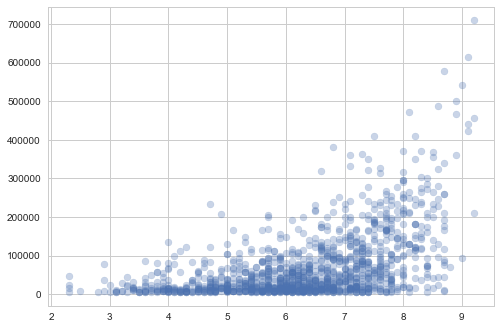

In [13]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df.db_ratings_count, alpha=0.3)

## 2.2 standard deviation

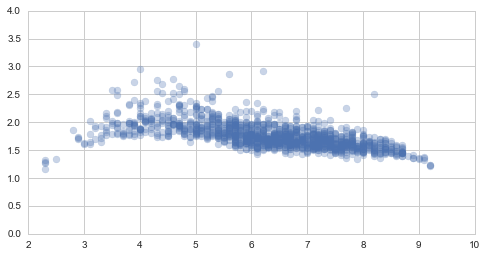

In [14]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.axis([2,10,0,4])
plt.gca().set_aspect('equal')
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, './all.html', show_ratings_num=False, click=True, show_distribution=True)

In [15]:
movie_list(df.sort_values(by='std',ascending=False))

## 2.3 Ratings Number Comparison (Converge)

In [16]:
for num in [0, 5000, 20000, 50000, 100000, 200000]:
    sub_df = df.query("db_ratings_count > @num")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
    ax.axis([2,10,0,4])
    plt.gca().set_aspect('equal')
    plt_configure(title = num, figsize=(3,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAACeCAYAAAB3j0V0AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAH2dJREFUeJztnWmQnFd573/nvEuvsy9aLcmSLAy+gMFGLlI2NpiLDVUu
EsqXGFGmUnxJHFclDpsTF5i1Ag6BJFBlDOYDt8xioDCJ74ULN4sDcUyMUWFj+woLyVo8+0xPT6/v
fs798M6MR9KoZyTP0iOfX5WqND3d7zzdff7vec7znOc5QmutMRgMiyLX2wCDoZ0xAjEYWmAEYjC0
wAjEYGiBEYjB0AIjEIOhBUYgbUIURXzqU5/iqquu4qqrruJv/uZvSJJkvc162WOvtwGGlC9+8Ys8
+uijfPWrX6XZbPKRj3yEYrHIn/7pn663aS9rhEkUrj9BEHDVVVfxhS98geuvvx6AH/7wh3z+85/n
0UcfRUoz0a8X5pNvAw4dOoTneezfv3/+sSuvvJJSqcTJkyfX0TKDEUgbMD4+Ti6Xo6OjY/6xgYEB
AMbGxtbLLANGIG2B53lkMplTHnNdF4AwDNfDJMMsRiBtQDabPUMIcz/ncrn1MMkwixFIG7B582aa
zSb1en3+scnJSQA2bdq0XmYZMAJpCy699FJyuRwHDx6cf+xXv/oV/f397NixYx0tMxiBtAHZbJab
b76ZT33qUxw8eJBf/OIXfOELX+B973vfepv2ssfkQdqEIAj4zGc+w49//GNc1+UP/uAP+NCHPmRy
IOuMEYjB0AJzezIYWmAEYjC0wAjEYGiBEYjB0AIjEIOhBUYgBkMLjEAMhhYYgRgMLTACMRhaYARi
MLTACMRgaIERiMHQAiMQg6EFRiAGQwuMQAyGFhiBGAwtMAIxGFpgBGIwtMAIxGBogRGIwdACIxCD
oQVGIAZDC4xADIYWGIEYDC0wAjEYWmAEYjC0wAjEYGiBEYjB0AIjEIOhBcsSSKlU4tprr+Xo0aOr
bY/B0FYsKZAoirj77rvJZrNrYY/B0FYsKZB77rmHW265hcHBwbWwx2BoK+xWv3zooYfo7e3lmmuu
4Wtf+9qyLrjwnD2Dod244oorzun5LU+Yeu9734sQAiEEhw4dYteuXXzlK1+ZP+R+MQ4ePHjORqwH
xs6VYyPYCOdnZ8sZ5Fvf+tb8/2+99VY+8YlPtBSHwXChYcK8BkMLWs4gC3nggQdW0w6DoS0xM4jB
0AIjEIOhBUYgBkMLjEAMhhYYgawQidL4QUyizppWMmxAlh3FMiyO1pqjwzNMlj3iRGNbgoGeHHu2
dSOEWG/zDC8RM4O8RI4OzzBV9rGkJONYWFIyVfY5Ojyz3qYZVgAjkJdAojSTZQ8pT50ppBRMlj3j
bl0AGIG8BKIoIU4WF0GcaKIoWWOLDCuNEchLwHEsbGvxdYZtCRzHWmOLDCuNEchLwJLpglyd5kop
pRnoyWFJs0jf6BiBvET2bOumvydLohRBlJAoRX9Plj3butfbNMMKYMK8LxEhBHu393Dx1m6iKMFx
LDNzXEAsKZAkSfjoRz/KsWPHEELwyU9+kn379q2FbatGojRhrEiUXrHBbEmBlTH3mwuNJV2sRx55
BIAHH3yQO+64g7/7u79bdaNWC601R4bK/PLZUQ4P+/zy2VGODJVpUVTZVphs/dqz5C3vrW99K9dd
dx0AIyMjdHZ2rrZNq8bCpJ5jifmkHsywd3vPmtqSKL1sl8xk69ePljXpC7nzzjv553/+Z770pS9x
9dVXn/V57dq0QSnNc8M+i41FpeEV27JnJPxWA601o9MRlWYy7+J15S229DpnHewjpZBKM0Yu+L3S
mq68zdY+d9VtvpBY0aYNpzM5Ocm73/1ufvSjH5HP5xd9TrsW8PtBzBOHxsnM5iaOHDnC3r17AQii
hDe8chOOYy16Vz+Xu/1SHBkqM1X2TxGjUpr+nuyis9gTT/yKOLsVS57pDSdKsf+yLeseFGjX7/x0
VrxpA8A//uM/Mj4+zh//8R+Ty+UQQiAX+bLaHcexkALCKMG2TrXflnByvEqp4hMnGimhu5Bl385u
ToxVV8y1mduacvpgn9uacvHW7jMGe6w0caKxFvnI57L1Jjiweiz5yb7tbW/jr/7qr3jve99LHMfc
ddddG67LotaaYyMzjJebzFQDbEtSqUXs0RqtwY8SpisBUghKlSbVRkgcl/nP3wzT35NjW3+RjCNR
SjMy0UApzb4dvedsx9zWlHMZ7LYUYLL168aSAsnn8/zDP/zDWtiyaswtzrf1F5FCUG2E1LyE4ck6
l+3pQ80opBSMTNWpNkKkENi2ZLzUIOPYjFBHCEm1HpAozdHhMn6U8KpdfWfMRq04n60pcjZbv5hb
ZrL1q88FMzfPrROkJVGJml8vnO7WbO0vsqlPQ1BiU1+e7QMdTEx7CKmp1AO0BmQ6AONEo7Xm5GiN
7s4MUghqjYBqI8QLhjl8oszl+waW5XLN2dfXlU1nq3MY7GlWfvEolmF12fACmQuBTkw3GZ5s0PBC
CjmH7QNFBnrzbOsvnuHWWEJgS4FSgABLwvB4jRfG60gBQkDGtpBCIyRUm+k1682QiXKTMFYIKZip
BwiR2nDJRYu7XGeEaGXq0mUci0SxrMG+0bL1KxnUWG82vEDm3KeJso8XxEgpqTUiRq0mQqTrhlZu
Tda1CaKEmhdhSWj4MWGYECuFLSXxUIVKM6DhR0xMN9EaCjkbP4jJZWwqtZCnj5bYva1n0cFw+IUy
41NNHNci46QqzQlJT1eGnZs6z2kQtXu2/kLM17Tvp70M5twngaBS96nUQ5p+hFIwNt1AAForertz
lE93a3Tq1gBkHYuejgwnx6t4foRlSQpZh0QpvCjGCxISDXGicCyJEIIgSlAabFtSrgb4YUwh68xf
P04Uh56f5olDoyQKXEfSVcywpa+AlILpis/e7YuLaqOyMBE7N2OvVyJ2pdjQApmLCgk0pYpPGCUI
IbAsSBIoVwPiRHH5vkEsKRgvNfHDhKxr0ZW32bWli1ojIIw1m3sLzGzymc67+EGCVpqpSpNiwUUK
0LPbO4QQRHF6DUGaZExUMr/lfe4u+tThSY4OVRidrpOxbToLLjPVAK012wY6LrgQ7fmEsDcCG/rb
mYsKKQ1BGJ+Sn5EyvbvXmyFhkm5MZHZ9ESeaF6YCHntqGC0Ex0ZmKOQyKKXp7chCh2aq7BGECogI
Y0VxNo/ihzG2kvR0WCRKMTRWJZu1efK5CXq7s9hSUJoJeGG8RqUe4PkJTZ3Q8CO6Ci4azeb+4lmj
Vov57xvBpz+fEPZGYONZvIC5gqWRiQYZ156fQbTW5DI25YpPmCQ8/PMjxLGmu8NlquJzfKTKxFSd
oZnj7N7aQ0+nw8nxChNln4Jr0wwjtE5F5tgydYnqPp6fbhTUgQY0vR0ZBntyFPMZDr8wQ+N3IWGQ
sGNLJ2OlJkprXFsSJYo4SetFxqY9Aj9m++biKYN9Mf+9vzvL8FRA+Oxo2/v0F2p15YYWCKQh0ERp
ejpcyrWQIIjJZGyUUunCWwiOj9ZwLMlvj5exLAhjjW1JolgxUa4zXbMIwphq3cezLLwoJu/a2JZE
a40XxOkuWq1RsztzavUQKSSb+zSHT5ao1EOiOBXBC+PVdE1SyOK6FoQQRIpEQZLE9HRl5qNWc7PD
yfEq05XgFP/96aMlhiYCNm9PH3upicqXwlKzmHWB5ms2vECUhp2bOtGv1kxMe0gh8MOYp49M4liS
rGvjBTEamKkHJEohpSQIEhIRpln1Rp2tfUU29xVxLMHEjI8Q4AURxbxDHCckWhPHGkE6s1iWRCUJ
R4amqTZjQBNFmjhR1Jt1NJCrhWQzNlnHoqPo0tORIeta8wvWI0NlJsseYax4fmiGjrzL5v4CaBBS
UK2HNPyEKEq

## 2.4 Time Shift

In [17]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(figsize=(4,4))
fig, ax = plt.subplots()
sub_df=df.query("db_ratings_count > 20000")
scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(figsize=(4,4))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQgAAAD3CAYAAADhRcqHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvVmMZVl19/nb+4x3intjyrlmoOBzfRI4u9HHE1BYtpGN
XK0yLoMlLMGDhWwh/GRAZSQ/IcSDZUuuxg9tWfKLJ6ktWrLkRgZZrW61gWwwUNRAFVU5REbGeOcz
7737YZ9780ZmRGRE5FCZGecnIVEZEfeeG3H2Onuv9V//JYwxhoqKiopdkO/0BVRUVNy/VAGioqJi
T6oAUVFRsSdVgKioqNiTKkBUVFTsiXuv3/DChQv3+i0rKipKzp8/f6jvv+cBAg5/kQ8SFy5cuKuf
T2nD915exZE3b/6U1nzwl07jSHHX3v9uf753mof58x3l4VwdMR4w8lxRqN2lK4Uy5Lm6x1dU8TBT
BYgHDM9zcJ3ddwiuI/A85x5fUcXDTBUgHjAcKVier6H1zl2E1obl+dpdPV5UHD+qAPEA8tTZDkvz
IUpr0lyhtGZpPuSps513+tIqHjLekSRlxe0hhOBd5+Z54kyHPFd4nlPtHCruClWAeIBxpMAJqj9h
xd2jOmJUVFTsSRUgKioq9qQKEBUVFXtSBYiKioo9qQJERUXFnlQBoqKiYk+qAFFRUbEnVYCoqKjY
kypAVFRU7EkVICoqKvakChAVFRV7UgWIioqKPakCREVFxZ5UAaKiomJPqgBRUVGxJ1WAqKio2JMq
QFRUVOxJFSAqKir2pAoQFRUVe1IFiIqKij2pAkRFRcWeVAGioqJiT6oAUVFRsSdVgKioqNiTKkBU
VFTsSRUgKioq9qQKEBUVFXtSBYiKioo9qQJERUXFnlQBoqKiYk9uGSCUUnz5y1/md3/3d/nUpz7F
66+/vuPr3/nOd3j++ed54YUX+Md//Me7dqEVFRX3nlsGiO9+97sA/P3f/z1f/OIX+fM///Pp1/I8
52tf+xp/8zd/w9/93d/xD//wD2xubt69q62oqLinuLf6hl/5lV/hIx/5CABXr15lbm5u+rU333yT
Rx99lHa7DcD58+f5/ve/z8c//vF9X/PChQu3ccn3P9Xne7B52D/fYbhlgABwXZc/+ZM/4dvf/jZ/
+Zd/Of330WhEq9Wa/nej0WA0Gt3y9c6fP3+ES30wuHDhQvX5HmAe5s93lMB34CTl17/+df7t3/6N
P/3TPyWKIgCazSbj8Xj6PePxeEfAOG4obcgKjdLmnb6Uioo7wi0DxL/8y7/w13/91wDUajWEEEhp
f+ypp57i4sWL9Ho9sizjBz/4AR/4wAfu7hXfhxhjeONKl++9vMrrKwnfe3mVN650MaYKFBUPNrc8
Yvzqr/4qX/7yl/m93/s9iqLgK1/5Ct/+9reJoogXXniBL33pS3zuc5/DGMPzzz/PyZMn78V131e8
udJjs5vgSInnCBwp2ewmQI93nZt/py/vrqK0Ic8VnufgSPFOX07FHeaWAaJer/MXf/EXe3792Wef
5dlnn72jF/UgobRhoxvjyJ2bMSkFG92YJ850HsqFY4zhzZUeG92YQhlcR7A8X+Opsx2EePg+73Gl
EkrdJnmuKNTuR4lC2afrw8jsrinwnOmu6c2V3jt9aRV3kCpA3Cae5+A6uz8xXUfgec49vqK7z2TX
JG/YGU12TVWS9uGhChC3iSPt1lrfsCi0NizP1x7K48Vx3TUdR6oAcQd46myHpfkQpTW5MiitWZoP
eeps552+tLvCcdw1HVcOJJSq2B8hBO86N88TZzoQrfDBXzr9wOwcjlKFmOyaNrvJjmPGw7xrOq5U
AeIO4kiB78oHYoHcbhXC7o52//mKh4cqQBxTZqsQTnnQPIx2Y3bXVOkgHl6qHMQx5E5WIRwpCAO3
Cg4PKVWAOIZUVYiKg1IFiGNIVYWoOChVgDiGHEftRsXRqALEMWVWu5Hm6qHXblQcjaqKcZ9xr7oj
qypExUGoAsR9wjvVHelIgRNUt0HF7lRHjHuI0oYkLXYtI1bdkRX3I9Wj4x5wq93BcfWUqLj/qXYQ
94Bb7Q4qXULF/UoVIG6T/Y4Nk6/fSrVY6RIq7leqI8YR2evYcKNR7WR34OwSiie7gzBwq+7IivuS
KkAckb2anTa28x3fd9DdQdUdWXE/UgWII7BfUrEfKZQ206f+Xt4JudJ0GsH0vytdQsX9SBUgjsB+
x4aJ0GlWW7Bzd6DZ6MVgQCnN915e3VHRqHQJFfcT1Z14BPY7Njjy5qTi7O7g1YtbOELiutejy3GZ
oVHx4FFVMY7Afs1O7fr+R4PBKNsRHKByg664f6kCxBHZq9np9IK3588cVu9wqxJqRcXdpjpiHJG9
kooX1vbePRy0olFNraq4X6h2ELfJYSzXDurDUPVlVNwvVAHiHnMrH4ZqalXF/UR1xLjH3ErvcBDl
ZVUGrbhXVHfaO8Reeofd8hRaGwqlkYKqL6PinlIFiPuMWeWlELC6FTEYpRRK05kLeOtqr0pWVtwz
qhzELsyWF9+JUuMkT7GyMWK7H4OAhXbI2aVmlaysuKdUO4gZZsuLeaHZ7NnFudyp4TrytkuNB/Wb
FELwxJkOa9sRJ+brOK7EKd9TCI5kInOvvC4rHi6qADHDbHlxbRAzim1nphSCM+XT+yiS6KPoGvJc
oTUEnoMyhixX00BxmGRlpamouB2qAFEy26GptWEwSqelxsE44+Si7dA8ytP7KHMwPc/BlXB1c8Rg
nKGUwXEEcw2fk/O1Aycrb3cGZ8XxpspBlMzKoAuld+QclDKoQpdfO5wF3FF1DY4UJLmiP0qRQuC5
EikE/VFKkqsDBahKU1Fxu1QBomS2vOg6cscCdByBUzZYHdYC7qh+k0obAs+h3QzR2pAX2jaDNUN7
7DjA4q68Litul+qIUXKjsctcM2AwTgGYa/g4QhzJAm6v/gutDVpr5A2KqEkyUWlDrgxL7dBa2WmD
60ikFKS5OlAOovK6rLhdqgAxw6yxy8JcgNYaBCy2rTT6KBZwNwYeYwyrWxH9YUK95nLhlWssz9d4
8kybX1ztT01l1rcjLq0NaDdCXFcy1/A5vdgADr6493KzqrwuD85xr/5UAWKG3WTQwG3fILOB58r6
iCjJabcCTi82EEKw2U24vDak5nu2grIdMU4KpJAMxxmLnRqDcQbAqYXGoRZ35XV5NKrqj2XfAJHn
OV/5yldYWVkhyzI+//nP87GPfWz69b/927/ln/7pn1hYWADgz/7sz3jyySfv7hXfA2Zl0HcikTcJ
PI+eapPlV/F9Z6prmHBxdcDTjy+ijGEwzpBCsDAXstVPUUqjDfSGCe97YuFQi7vyujwaVfXHsm+A
+Na3vkWn0+Eb3/gGvV6P5557bkeA+OlPf8rXv/51nnnmmbt+ofeau/EE0UojpbgpOBRKkxXXKyVK
GaQrEELQbvo8caaNlHYC12Mn5w78/jduj6smr4NRTTq7jjA3DnKYYTweY4yh2WzS7Xb57d/+bf79
3/99+vWPf/zjvPvd72ZjY4OPfOQj/MEf/MEt3/DChQt35srvMle3MvpRgZxZjNoY2nWXM4v+kV5T
a8NrKwk33lvaGK5sZpxbsq+7spVPv8cYw5lFHykE2sDTZ8ObypY3YoxhdTvf4bDdrjucXvCO1fb4
qGSF5vWVBG+XBG+uDO85G+K7D2YB8Pz584f6/n0fKY2GTYqNRiO+8IUv8MUvfnHH13/jN36DT3/6
0zSbTf7oj/6I7373u3z0ox+94xd5r1HakL28ykl5802gtOb9v3R6zyfIhQsX9v1886e7uyYNzz6S
U/M9pBQ050fTnMNcI+DMUgOtDUvz4YG2t29c6VIECcvY3Ylb7pE7B/z5/bjV53vQuXDhAh/8n/8n
qK/etIMA+/f

In [18]:
for year in range(2008,2017):
    sub_df = df.query("year == @year")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
    ax.axis([2,10,0,4])
    plt.gca().set_aspect('equal')
    plt_configure(title=year, figsize=(3,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAACeCAYAAAB3j0V0AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF5VJREFUeJzt3XmMVfXdx/H37yx3m7mzwQADCiKV0u3RR6xocKG1rbaJ
aTCkRQxN4z+tNbE0SqiUUltsXf7QqpEi+IcGtbZNTYtNY6ON6SKJFatWKNVHUGSGGWa7s9z1LL/f
88dlpgMM5wLOcmG+r8SEueecO98zns/5Lefce5QxxiCEGJU12QUIUc0kIEJEkIAIEUECIkQECYgQ
ESQgQkSQgIyTjo4ObrvtNpYsWcLSpUu588476e/vB8D3fX7yk5+wZMkSlixZwv33308YhsPbVlqe
zWZZv349l112GZdddhnr1q0jk8lM+D5OCUaMuSAIzPLly83NN99s9u7da9566y2zfPly861vfcsY
Y8y9995rvvjFL5o33njDvPLKK2bp0qXm0UcfHd6+0vI77rjDrFixwuzZs8fs3r3bLF++3HznO9+Z
8P2cCiQg4+Dtt982CxcuNJ2dncOv7dq1a/i1Cy+80Lz00kvDy5577jlz+eWXmzAMTbFYjFxujDEX
X3yxef7554eX79ixw1x00UUTsGdTj3SxxsGcOXPYtm0bzc3Nw68ppQBoa2ujUChw6aWXDi+75JJL
6Onp4cMPP2Tv3r2RywEaGxt5/vnnGRwcJJvN8oc//IFPf/rTE7R3U4sEZBw0NjZy1VVXHfXaE088
wbx58zh8+DDJZJJ0Oj28bChIHR0dFZcDbNq0iT179vDZz36WSy65hP379/PAAw+M925NSRKQCbB1
61ZefPFFfvCDH1AoFIjH40ctj8ViAHieV3E5wP79+5k/fz5PPvkkTz75JOl0mrVr12Lktrox50x2
AWe7Rx99lIcffpiNGzdy9dVX88ILLwwf6EOGfk4mkyQSicjlH374IXfffTcvvPAC8+bNA+CRRx7h
mmuu4R//+AdLliyZgL2aOqQFGUc//elPeeSRR7jrrru46aabAJg1axb5fJ5sNju8XldXFwAzZ86s
uHz37t0kEonhcEB5zNPY2MjBgwcnYremFAnIOHnooYd46qmnuOeee7jxxhuHX1+0aBHJZJLXX399
+LVdu3Yxffp05s6dW3H5zJkzyefztLa2Di/v7u6mr6+PuXPnTszOTSWTPY12NtqzZ49ZtGiRuf/+
+01nZ+dR//m+bzZt2mQ+//nPm127dpmdO3eapUuXmi1btgxvH7U8CAJzww03mJUrV5q3337b7Nmz
x6xevdqsWLFieBpYjB1ljIzsxtqDDz7Ili1bRl32/PPPM2/ePO6++27++Mc/EovFWL58OXfccQeW
VW7QS6VS5PLu7m7uvfdedu7ciTGGpUuXsn79epqamiZsH6cKCYgQEWQMIkQECYgQESQgQkSQgAgR
QQIiRAQJiBARJCBCRJCACBFBAiJEBAmIEBEkIEJEkIAIEUECIkQECYgQESQgQkSQgAgRQQIiRAQJ
iBARJCBCRJCACBFBAiJEBAmIEBEkIEJEkIAIEUECIkQECYgQESQgQkSQgAgRQQIiRISTCkhPTw9X
X301+/btG+96hKgqFQPi+z4bN24kkUhMRD1CVJWKAbnvvvtYuXIlM2bMmIh6hKgqkU+5fe6552hq
auLKK69k69atJ/WGI5+tJ0S1Wbx48SmtH/mEqZtuugmlFEop9u7dy3nnnccvfvGL4Qfbj+b1118/
5SImg9Q5ds6EGuH06oxsQZ5++unhf69evZq77rorMhxCnG1kmleICJEtyEjbt28fzzqEqErSgggR
QQIiRAQJiBARJCBCRJCACBFBAiJEBAmIEBEkIEJEkIAIEUECIkQECYgQESQgQkSQgAgRoeLdvGEY
smHDBt5//32UUvz4xz9m4cKFE1GbEJOuYgvy8ssvA/Dss8+yZs0aHnzwwXEvSohqUbEF+cIXvsCy
ZcsAOHToEHV1deNdkxBVI/Iz6SOtW7eOF198kYcffpgrrrjihOvJlzaIanbKn503p6Czs9MsW7bM
5HK5E66za9euU3nLSSN1jp0zoUZjTq/OimOQ3/3udzz22GMAJJNJlFJYlkx+iamh4hjkS1/6Enfe
eSc33XQTQRCwfv16+ZZFMWVUDEgqleKhhx6aiFqEqDrSVxIiggREiAgSECEiSECEiCABESKCBESI
CBIQISJIQISIMCUDEmqDF2hCfVL3aYop7KQff3A2MMawr62PrkyBd9uKkGqnuTHJgjkNKKUmuzxR
haZUC7KvrY/uTBHbsnBthW1ZdGeK7Gvrm+zSRJWaMgEJtaErU8Cyjm4pLEvRlSlMue5WqA3FUjDl
9vtUTZkulu+HBKHBHuWUEIQG3w+x49X55wh1uT7XtbGtj9YVHNnNDEKDYyvpZkaIPCJ832f9+vW0
tbXheR633HIL11xzzUTVNqZc18axRz8AHFvhuvYEV1SZMYZDPR7envYxO5hHdjOHThbdmSLQx8fO
aRy74s8SkV2sHTt20NDQwDPPPMPjjz/Opk2bJqquMWdb5YNLH9Ol0NrQ3Jg8pTNzVPdkaJkX6I/c
hdnX1kd/PsC2LOKu/ZHHTNLNPHWRLch1113HtddeC5TPZrZdfWfZU7FgTgNQ7l74oSHUeviMfDKC
UPPOBxn6ckW05qgzOpQP6I6eHAc7Bil6IbUpl3Oaa2luSp3yWX/4YFajH8zzZzeccncrqpvp+ZrB
XIl0Tfwjd+POJif1pQ3ZbJZbbrmFr33ta1x//fWR654JX9qgtSHQBsdSx51NR2OMob3X5/3DRbLF
ENuyqIlbNKZtjIH6lIMxhgOdJTr6PAoljWUpYo5iVoNLU51Lfcph9rTYSdfoBZp324q4o3QL/dCw
cE6CmHNqcyxaG95pK2Ip0MagNShl6MuF5IqaWQ0ujmNRn7JpaXJHDfSp/u2qzal+aUPFUWl7ezu3
3norq1atqhiO0y1iooXa8I/XdnHx4sWRZ8uhwfGHhwfw3CIZv48mS6GNIQg0qbo4c5rT+GHIoe4s
oZOlpLN4OiQIQqzAwgy6nDO3hcaGBIsWzcR1bHSoTzjg9gJNvuARj7sEsXb+7739LFr4MRzHKh+c
oUYpuPQzs0/rTN8wq5e33+slm/cItWEgW0LbsOiCNLOnp4FyCBoaE0eNSY4d3DOi9fznP/9Z9f/P
4fRO3pEB6e7u5uabb2bjxo1cfvnlp11YtTjZC4Uj1/MCzfttfdQk4wShJpv1yRd9tIaO3hwGqEvF
2N/aTxAaCl553KGUIgw0fYMl9rdl2N+qOHg4S8kPqEnGmNNcw4wRXS+tNX95o5UD7QOU/JCOnjy5
go9fyNI+cADHdpjZlEQD9bUx/vN+Lx8/rxFnRH/ppGe7lAFV3s98ySeZcIcXDYWwvStHy/RaEjEH
21KRg/uzWWRAtmzZwsDAAJs3b2bz5s0AbNu27Yz90oYTXSg8dgbnqINBGYxR5IserZ1ZYq6FUgrb
hjCEvoESpVJIySsfmGFg8ENNGGoM5b59V6aAbSmm1SdxHZtCKaAzU8RSFn7QS8u0Gl77dweHunM4
ts3BzizZvIc2hsGixuvJU/QC2ntjzJlRi6UMr/yrjf8c6OHChc2cP7ue/Yf6Tzh1OxQcy7bo7ity
TnOa0BgKBR+jIO7Y9Gc9tMkykC3SlSlQ8AJaOweZ11LHtIYkPX0FnGPGoEPjIafC4H4sp6knWmRA
NmzYwIYNGyaqlnE1NOi1j/nKomMHvceuZzsW9pFxQNHzcZ3YcGtjWZSXKUMy4eD5mlDrI90gBabc
HfJ9TckYhg4NSyn6Bwt09ebozORpqk/x3sFeGtJx5jTX0DdYDmepFJIvhliuxrFs+nMedGbpGyxR
k4jRnSngBYb

# 3. Popular Moives

In [19]:
df = df.query("db_ratings_count > 20000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,year,mode,std,std2
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,0.064472,0.127613,0.366445,0.301790,0.139686,6.649142,102703.694853,2012.263480,6.629902,1.723397,1.866304
std,0.116071,0.107045,0.131259,0.144212,0.126708,1.244955,90533.718923,3.182072,1.646051,0.206157,0.302320
min,0.001000,0.003000,0.017000,0.004000,0.009000,2.300000,20249.000000,1992.000000,2.000000,1.168114,1.209959
25%,0.007000,0.035750,0.266000,0.178500,0.049000,5.900000,40658.250000,2010.000000,6.000000,1.578959,1.666133
50%,0.019000,0.089500,0.384500,0.319500,0.094000,6.800000,71384.500000,2012.500000,6.000000,1.691804,1.815489
75%,0.065250,0.210250,0.475000,0.429000,0.188000,7.600000,133573.500000,2015.000000,8.000000,1.839350,1.978635
max,0.929000,0.400000,0.595000,0.569000,0.676000,9.200000,709045.000000,2017.000000,10.000000,2.651356,3.793152


In [20]:
movie_list(df.query("db_ratings_count > 100000").sample(frac=0.03).sort_values(by='db_rating',ascending=False), len=8)

In [21]:
df['std'].hist(alpha=0.5, figsize=(4,2))
plt_configure(xlabel='STD', ylabel='Frequency')
plt.figure()
bins=arange(0,10,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))
plt.gca().set_xlim([2, 10])
plt_configure(xlabel='Rating', ylabel='Frequency')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARMAAACZCAYAAAAM9d6yAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEOdJREFUeJzt3XtMU2cDBvCnLRSU4mXDGRVwoiAzxqmoaBSdwoLXoIJV
mgkZzg2icTBiUKcom1MXmG4xEofZMocyZahTN4MGxWAwEu3mdd43NVo14gVtkdt4vz8MnSiUU3dO
aT+e31/0tD19OB4e33OtSgghQET0H6lbOwAR/X9gmRCRLFgmRCQLlgkRyYJlQkSyYJkQkSzcWjvA
qzAaja0dgajNCgkJaXK6S5YJ0Pwv9KqMRqPs83xVzpKFOZijqc9uDjdziEgWLBMikgXLhIhk4bL7
TKhpefsvyDYvk6kCTrCLgFwERyZEJAuWCRHJgmVCRLJgmRCRLFgmRCQLlgkRyYJlQkSyYJkQkSxY
JkQkC5YJEcmCZUJEsmCZEJEsWCZEJAuWCRHJgmVCRLJgmRCRLHhzpFbW1M2MTKYKXCyX7yZHRI7A
kQkRyUKRkUltbS2WLFmCW7duoaamBklJSejTpw8WLVoElUqFwMBALF++HGq1Gvn5+di2bRvc3NyQ
lJSEsWPHKhGJiBSmSJns2bMHnTp1QmZmJh49eoSpU6ciODgYycnJCA0NRXp6Og4ePIiBAwciNzcX
O3bsQHV1NQwGA0aOHAmtVqtELCJSkCJlMn78eERGRgIAhBDQaDQ4d+4chg0bBgAYPXo0SktLoVar
MWjQIGi1Wmi1Wvj7++PChQsYMGCAErGISEGK7DPx8vKCTqeD2WzGggULkJycDCEEVCqV9fknT57A
bDbD29u70fvMZrMSkYhIYYodzbl9+zbmzZsHg8GAKVOmIDMz0/qcxWJBhw4doNPpYLFYGk1/vlxs
UeL7hlvjO4xNpopmppscnKRpzvK9zszRmLPkeJ4iZVJeXo6EhASkp6djxIgRAIB+/fqhrKwMoaGh
KCkpwfDhwzFgwAB8/fXXqK6uRk1NDa5evYqgoCBJn/H/8l3DTR0CNplM6N69u8OzNJWjrX+3LnO8
/NnNUaRMNm7ciMePHyM7OxvZ2dkAgE8//RQrV67E2rVrERAQgMjISGg0GsyePRsGgwFCCKSkpMDD
w0OJSESkMEllMnfuXEyfPh0RERFwd3dv8fVLly7F0qVLX5q+ZcuWl6bp9Xro9XopMYjIiUnaAfvh
hx/iyJEjiIyMREZGBk6fPq10LiJyMZJGJkOHDsXQoUNRVVWFwsJCLFiwADqdDjExMTAYDDwvhIik
7zMpKyvD7t27UVpaitGjR2PixIkoLS1FUlISvvvuOyUzEpELkFQmY8eOha+vL6Kjo5Geng5PT08A
wLBhwxATE6NoQCJyDZLKZPPmzfDy8sLrr7+OqqoqXL9+HT179oRGo8GuXbuUzkhELkDSDtjDhw/j
gw8+AADcv38fiYmJ2L59u6LBiMi1SCqT/Px8bN26FQDQo0cP7Ny5s8nDvETUdkkqk9ra2kZHbKSc
a0JEbYukfSYRERGIj4/HhAkTAAAHDhzAuHHjFA1GRK5FUpksXLgQhYWFOH78ONzc3BAXF4eIiAil
sxGRC5F8nknv3r3h4+MDIQQA4Pjx4xg6dKhiwYjItUgqk4yMDBQXF8PPz886TaVS4ccff1QsGBG5
FkllUlpaisLCQuvJakREL5J0NMfPz8+6eUNE1BRJI5OOHTti0qRJ1vu1Nli9erViwYjItUgqk7Cw
MISFhSmdhZxQU18S9l8ZIoNlnye1PkllMm3aNNy8eRNXrlzBqFGjcPv27UY7Y4mIJO0z2bdvH5KS
kvDFF1+goqICs2bNwu7du5XORkQuRFKZbNq0CT/99JP1yuFdu3YhJydH6WxE5EIklYlarYZOp7M+
fuONN6BW82uKiehfkvaZBAYGYsuWLairq8P58+eRl5eH4GDuRCOif0kaXqSnp+Pu3bvw8PDAkiVL
oNPpsHz5cqWzEZELkTQyad++PVJTU5Gamqp0HiJyUZLKJDg42Po9wQ26dOmCkpISRUIRkeuRVCYX
Lvx74lJtbS2Kiopw8uRJxUIRkeux+5CMu7s7JkyYgGPHjimRh4hclKSRyS+//GL9WQiBy5cv89aN
RNSIpDIpKytr9Lhz585Yt26dIoGIyDVJKhNeHUxELZFUJuPGjXvpaA7wbJNHpVLh4MGDsgcjItci
qUymTJkCd3d36PV6uLm5Ye/evThz5gxSUlKUzkdELkJSmRw5cgQ7d+60Po6Pj8f06dPRo0cPxYIR
kWuRfGj46NGj1p+Li4vh5eWlSCAick2SRiafffYZ0tLSUF5eDgAICAjAl19+2eL7Tp06haysLOTm
5uL69etYtGgRVCoVAgMDsXz5cqjVauTn52Pbtm1wc3NDUlISxo4d+99+IyJqFZLKpH///vjtt9/w
4MEDeHh4SBqVbNq0CXv27EG7du0APDsilJycjNDQUKSnp+PgwYMYOHAgcnNzsWPHDlRXV8NgMGDk
yJGN7jNLRK5B0mbOrVu38P7772PWrFmorKxEXFwcbt68afM9/v7+WL9+vfXxuXPnMGzYMADA6NGj
cfToUZw+fdp6k2pvb2/4+/s3OnWfiFyHpJFJeno65syZg6ysLPj4+GDy5MlIS0vD1q1bm31PZGRk
o8JpOIwMAF5eXnjy5AnMZjO8vb2tr/Hy8oLZbJYU3Gg0SnqdPZSYZ0tMpopmppscnKRpSuQwGi2v
8B7H/9s0hTmaJ6lMHj58iFGjRiErKwsqlQp6vd5mkTTl+TuzWSwWdOjQATqdDhaLpdH058vFlpCQ
ELs+vyVGo1H2eUpxsfzlkZjJZEL37t0dnsVROUJC7LuxVmv92zBH05/dHEmbOZ6enrhz5451ZHHi
xAm792v069fPelp+SUkJhgwZggEDBsBoNKK6uhpPnjzB1atXERQUZNd8icg5SBqZLF68GB999BFu
3LiBqKgoVFRU4JtvvrHrg9LS0rBs2TKsXbsWAQEBiIyMhEajwezZs2EwGCCEQEpKCjw8PF7pFyGi
1iWpTO7fv4+CggJcu3YN//zzDwICAiSNTHx9fZGfnw8A6NWrF7Zs2fLSa/R6PfR6vZ2xyZXZ+8Ve
JlNFk5uDDfilXs5B0mZOZmYm3N3dERgYiODgYB66JaKXSBqZ+Pn5YfHixXj77bfh6elpnT516lTF
ghGRa7FZJnfv3kXXrl3RuXNnAM/OaH0ey4SIGtgsk8TEROzatQurV6/G999/j4SEBEflIiIXY3Of
iRDC+vPevXsVD0NErstmmTx/Q6Tni4WI6EWSb0HQ1J3WiIga2NxncvnyZYSHhwN4tjO24WferpGI
XmSzTPbv3++oHETk4myWCW/LSERS2f2NfkRETWGZEJEsWCZEJAuWCRHJgmVCRLJgmRCRLCTdgoD+
Ze+NfYjaCo5MiEgWLBMikgXLhIhkwTIhIlmwTIhIFiwTIpIFy4SIZMEyISJZ8KQ1cnlyn0jIbwh8
NRyZEJEsWCZEJAtu5hC9oLnNppa+QN2WtrDpxJEJEcmCZUJEsmCZEJEsnGKfSX19PVasWIGLFy9C
q9Vi5cqV6NmzZ2vHIiI7OMXIpKioCDU1Ndi+fTtSU1OxZs2a1o5ERHZyipGJ0WhEWFgYAGDgwIE4
e/asLPO152Sm/7Knnqglcp5YZzJVICREttnJxinKxGw2Q6fTWR9rNBrU1dXBzc0p4hE5HWc869cp
/lp1Oh0sFov1cX19fYtFYjQaW5xvXx/pGfr6dARgafF1juAsWZij7eSQ8vfUEqcok8GDB6O4uBgT
J07EyZMnERQUZPP1Ic44xiNq41RCCNHaIRqO5ly6dAlCCKxatQq9e/du7VhEZAenKBMicn1OcWiY
iFwfy4SIZME

## 3.1 Standard for evaluating STD

2.2363385253580703


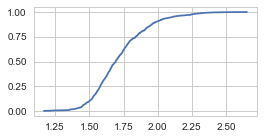

In [22]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['std'])
plt.plot(ecdf.x, ecdf.y)
plt_configure(figsize=(4,2))
std_standard = sp.optimize.brentq(lambda x: ecdf(x)-0.97 , 0, 4)
print(std_standard)

## 3.2 Scatter

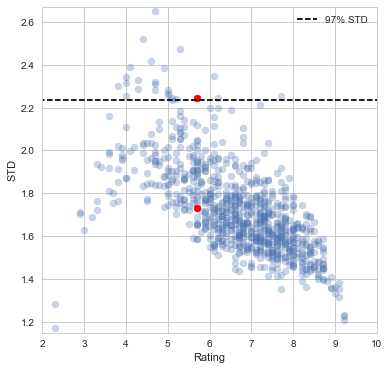

In [23]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3, label='')
plt.plot([0,10],[std_standard,std_standard], linestyle='--', color='black', label='97% STD')
sub_df = df[df['name'].str.contains("西游伏妖|杜拉拉升职记")] 
# sub_df = df[df['name'].str.contains("夏有乔木|爸爸去哪|刺客聂隐娘|一步之遥")] 
ax.scatter(sub_df.db_rating, sub_df['std'], color='red', label='') # s=80, 
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, '.\popular.html', show_ratings_num=False, click=True, show_distribution=True)

## 3.3 Big deviation movies

In [24]:
movie_list(df.sort_values(by='std',ascending=False), len=30)

## 3.4 Timeshift

In [25]:
std_925 = sp.optimize.brentq(lambda x: ecdf(x)-0.925 , 0, 4)
for year in range(2008,2017):
    sub_df = df.query("year == @year")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.4, label='')
    ax.axis([2,10,df['std'].min(),df['std'].max()])
    plt.plot([0,10],[std_925, std_925], linestyle='--', color='black', label='92.5% STD')
    sub_df_outliers = sub_df.query("std >= @std_925")
    ax.scatter(sub_df_outliers .db_rating, sub_df_outliers ['std'], alpha=0.5, color='red', label='')
    plt_configure(title=str(year)+ ': '+ str(len(sub_df_outliers))+'/'+str(len(sub_df)), 
                  xlabel='Rating', ylabel='STD', figsize=(2.5, 2.5), legend=True)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADGCAYAAACXUs/uAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXl0FFXa/z9VvaQ7GwGysARCQKOO+BNBBF4QnDAOzDgO
oGGLEj3hzMsg6iCrOAyiIMu4MYDIwLy+YgRlZPwdwJ9vfNXBDWZQGIKGCSBBIBBIOmTtdKeXqvv7
o0lJCHSCknSW+zmHc6i6Vbee7tS37/I897mKEEIgkUguixpqAySSlowUiEQSBCkQiSQIUiASSRCk
QCSSIEiBSCRBkAK5Rpw7d47HH3+cQYMGMXToUBYsWEBFRYVR7vP5ePbZZxk0aBCDBg3ij3/8I5qm
Nbrc6XTy1FNPMXjwYAYPHsz8+fMpKytrtH0N1Q9w/PhxfvaznwFw4MABbrjhhjr/brvttquqr00g
JD8av98vxo0bJzIzM0VeXp44ePCgGDdunJg2bZpxzYoVK8Tdd98tDhw4IHbv3i2GDh0qXnnllUaX
z5kzR6SlpYlDhw6J3NxcMW7cOPHII4802saG6hdCiKysLLFo0SIhhBB//etfxa9+9StRXFxs/Csp
Kbmq+toCUiDXgG+++UakpKSI4uJi49y+fftESkqKqKioEDU1NeLWW28VH330kVH+7rvviiFDhghN
0xosF0KI/v37i507dxrlO3bsEP369WuUfY2pXwghpk2bJj744AMhhBDLli0TM2fO/FH1tQVkF+sa
0L17dzZu3EhcXJxxTlEUACorK8nLy8PtdnPHHXcY5bfffjvnz5/n1KlTDZYDdOzYkZ07d1JVVYXT
6eS9996jb9++xvVTpkxhypQpl7WvMfX7/X7279/P4MGDATh27BjJyck/uL62gjnUBrQFOnbsyPDh
w+uce/3110lKSiIxMZFDhw5ht9uJiooyymvFdO7cOSoqKoKW9+rViyVLljB37lwGDhwIQI8ePdiy
ZYtx/Zo1a65oX1FRUYP15+Tk0Lt3b6KjowHIz88nLCyMX//615SVlTFw4ECefPJJ4uPjG1VfW0G2
IE3Ahg0b+PDDD/n9738PgNvtJiwsrM41VqsVAK/X22A5BAbQycnJbNq0iU2bNhEVFcXcuXMRF0Lp
YmJiiImJuaw9jal/9+7dDB06FIDq6mrOnj2L1+tl6dKlvPDCCxQWFjJ16lR8Pl+j6msryBbkGvPK
K6+wevVqFi1axIgRIwCw2Wz1XpzaY7vd3mD5qVOnWLp0KdnZ2SQlJQGBFmPkyJF8+eWXDBo0KKhN
DdUPAYHMmzcPgIiICPbt24fdbsdsDrwia9eu5c477+TLL79sVH1tBdmCXEOee+451qxZw+LFi3ng
gQeM8126dMHlcuF0Oo1zDocDgISEhAbLc3NzsdlshjggMO7p2LEjBQUFDdrVUP2VlZWcOHGCfv36
GeVRUVGGOABiY2OJiYmhqKiowfraElIg14g//elPvPnmmyxfvpzJkyfXKbvxxhux2+3s37/fOLdv
3z5iY2Pp2bNng+UJCQm4XC5Onz5tlJeUlFBeXk7Pnj0btK2h+v/xj38wYMAAQxAHDx7ktttuq/O8
wsJCSktL6dOnT4P1tSlCPY3WFjh06JC48cYbxR//+Mc6foPi4mLh8/mEEEIsWbJEpKamin379ok9
e/aIoUOHivXr1xt1BCv3+/3ivvvuE5MmTRLffPONOHTokJgyZYpIS0szplXLyspEWVnZFW0MVv8f
/vAH8eabbxrXejweMXr0aDFlyhTDrzN+/Hjx8MMPN6q+toQUyDXgpZdeEikpKZf9d+TIESFEwHew
cOFC0b9/fzF48GCxcuXKOj6DhsodDoeYPXu2GDJkiBg8eLCYPXu2OH/+vFH+4IMPigcffPCKNgar
f+TIkeL48eN1ri8oKBAzZswQAwcOFAMGDBDz5s0T5eXljba3raAIIVcUSiRXQo5BJJIgSIFIJEGQ
ApFIgiAFIpEEQQpEIgmCFIhEEoRWH4t1sTdXImmIAQMGXNX1rV4gcPUfuqnYv3+/tKWF2gE/7MdU
drEkkiBIgUgkQZACkUiCIAUikQRBCkQiCYIUiEQSBCkQiSQIbcIPIvlheL1eFixYQEFBAZGRkSxa
tIhevXqRl5fHkiVLMJlMWK1WVq5cSWxsbJ17x40bR2RkJACJiYksX76czz77jNWrV9OtWzdWrVqF
qqr893//NwkJCSQmJtZ7/qeffsprr72GEIKamhoefPBBfv3rXzN79myKi4s5c+YMFouF+Ph4UlJS
+PnPf87MmTO57rrrEELg9/vJyMjgl7/8ZdN9SaFdr/Xj2bdvX6hNMGhttmRlZYmFCxcKIYTIz88X
mZmZQgghHnjgAfHvf/9bCCHEW2+9JZYtW1bnvpqaGjFmzJh69U2bNk1UVFSIJUuWiEOHDom8vDwx
Z86cKz5/xIgRoqKiQgghRFVVlUhNTa2T3nT16tViy5YtxvE///nPOtkenU6nGDdunGFrQ/yQv0+T
tCA+n4+nnnqKM2fO4PV6mT59OiNHjjTKX3/9dd555x06deoEwDPPPEOvXr1YvHgxR44cwWq1snTp
0jpZPNoDl0u4NnnyZJYvX37V5V6vl8LCwqDPO3bsmJHwrnfv3uTn5wPw0ksvER8fD4CmafVyYB0+
fBi3201mZiZ+v59Zs2bRr18/IiIiqKmpwePxYLfbWbt2LWPHjr3i86OionjjjTcYNWoU1113Hf/z
P/9j5NdqDBEREUycOJHs7GxuuummRt93NTTJGGTHjh3ExMSwZcsW/vKXv7BkyZI65bm5uaxcuZKs
rCyysrLo3bs3H330EV6vl61btzJ79mxWrFjRFKZJLuKmm25i165dCCHIycmhqKgITdMMcfzrX//i
zTff5OGHH65zn81mY+rUqfzXf/0XzzzzDHPmzMHv9/PII4+wfPlyunfvzqlTp+jfvz979uxh0aJF
HDhwoN7zX3vtNdxuN7NmzWLYsGH8+c9/NhLhNZbOnTtfVZb7q6VJWpDRo0czatQoAIQQmEymOuWH
Dh1iw4YNOBwO7rrrLqZNm8b+/fu58847AejXrx+5ublNYVqL5sSJE9esvDFxR/fffz/5+fmkp6fT
v39/br75ZuNv9f777/Pqq6+yYcMGo6WvJTk5maSkJBRFITk5mZiYGBwOB3369OHll19G0zRmzpzJ
0qVLeeSRR9i0aRPTp09n48aNRh0VFRUUFhYyd+5c5s6dS1FREY899hg333wzqampDdpeS2FhIV26
dGn09VdLkwgkIiICCOxp8fjjjzNz5sw65ffccw/p6elERkby6KOPsmvXLpxOpzHoAzCZTPj9/jrJ
y65ES4robU22HD16lLi4OObMmcPx48fJzc1l//79fPHFF3z88cfMmTOH4uJiiouL69z34YcfUlBQ
QGZmJmVlZZSUlFBQUGB06T788ENuueUWcnJyEEJw4MABiouL69hTXl7OokWLWLJkCR06dEDXdcxm
MydPnjSuKywsxOVyGcdHjx6ltLTUOHa5XLzxxhv87ne/a7Lvvcmympw9e5YZM2aQnp5OWlqacV4I
gdPpNBIfb968mfLyciorK7n11luNGYnhw4fz2WefNficlhYt2ppsKS0tZdasWbjdbqKionjuueeI
jY1lyJAhdO3a1UhkPXDgQB5//HHmzZvHzJkziY2NZcGCBRQWFqIoCnPmzKF///5A4Edx4cKFrFq1
CoDp06dz/vx50tPT641HPv74Y9atW4fZbEbTNO666y4effRRo3zNmjXExsYaifj27t1rzGKpqoqm
aWRkZPDzn//8mn0n9bjqYX0jcDgcYvTo0WLPnj31yiorK8Xw4cOF0+kUuq6Lxx57THzyySciOztb
zJ8/XwghxIE

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

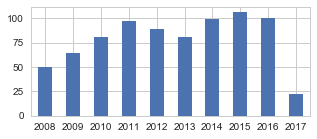

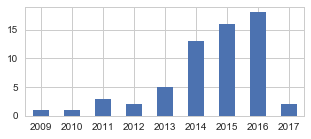

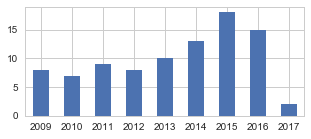

In [26]:
df.query("year >= 2008")['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(5,2))
plt.xticks(rotation=0)
# plt_configure(title='豆瓣评分超过2W的电影数量')
plt.figure()
df.query("std >= @std_925")['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(5,2))
# plt_configure(title='标准差STD在92.5%以上的电影分布')
plt.xticks(rotation=0)

plt.figure()
df.query("db_rating <= 5 ")['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(5,2))
plt.xticks(rotation=0)

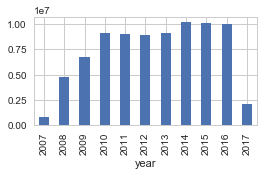

In [27]:
df.query("year >= 2007").groupby('year')['db_ratings_count'].sum().plot(kind='bar')
plt_configure(figsize=(4,2))

In [28]:
for year in range(2008, 2017, 3):
    sub_df = df.query("year >= @year & year<=@year+2")
    print(year, len(sub_df), sub_df['db_ratings_count'].max())
    sub_df['std'].hist(alpha=0.5, figsize=(4,1.8), bins=arange(df['std'].min(), df['std'].max(), 0.1))
    plt.xlim([df['std'].min(),df['std'].max()])
    plt_configure(xlabel='STD', ylabel='Frequency')
    plt.figure()
    sub_df['db_rating'].hist(bins=arange(2, 10, 0.5), alpha=0.5, figsize=(4,1.8))
    plt_configure(xlabel='Rating', ylabel='Frequency')
    align_figures()

2008 195 709045


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ0AAACQCAYAAAASnT4hAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEK9JREFUeJzt3X1QFPUDBvDnAIHkfA11VNA8PaTGmVIUdRJ8AQdNHVIQ
gUmYMAsGRzFGQVNe0p/oYDqNIymWk2FnGmlqGTr4MhAlg5eYmq+VOnjCqODL8SJHfH9/OFyhcuwa
e3fE8/mL29u9fVyWx327XZUQQoCISCIHWwcgovaFpUFEsrA0iEgWlgYRycLSICJZWBpEJIuTkh++
detWHDt2DCaTCREREfD19UVycjJUKhW0Wi1SU1Ph4MDeImpPFPuLLS4uxunTp7Fr1y7k5OSgvLwc
GRkZSEhIgE6ngxACR48eVWr2RKQQxbY0fvzxR3h5eSE+Ph5GoxFLly7Fnj174OvrCwDw9/dHUVER
Jk+e3OJn6PV6peIRkQQ+Pj5PDVOsNKqqqmAwGLBlyxaUlZUhLi4OQgioVCoAgJubGx4+fKjU7IlI
IYqVRvfu3aHRaODs7AyNRgMXFxeUl5eb36+urkbXrl1b/ZxnNZ0ler1e9jRKs8dMAHPJYY+ZAGVz
tbSlr9gxDR8fHxQWFkIIgYqKCtTW1mLs2LEoLi4GABQUFGDkyJFKzZ6IFKLYlsbEiRNRUlKC0NBQ
CCGQkpICDw8PrFy5Ehs2bIBGo0FQUJBSsycihSh6ynXp0qVPDdu5c6eSs2z3dIcvPve0kUHebZiE
6Nl4kQQRycLSICJZWBpEJAtLg4hkYWkQkSwsDSKShaVBRLKwNIhIFpYGEcnC0iAiWVgaRCQLS4OI
ZGFpEJEsLA0ikoWlQUSysDSISBaWBhHJwtIgIllYGkQki6TSmD9/Pn744QeYTCal8xCRnZNUGu++
+y4KCwsRFBSE9PR0/Prrr0rnIiI7Jelu5KNGjcKoUaNQV1eHvLw8LFy4EGq1GqGhoYiMjISzs7PS
OYnITkh+hEFxcTH279+PoqIi+Pv744033kBRURHi4uLw2WefKZmRiOyIpNKYOHEiPDw8EBISgpSU
FLi6ugIAfH19ERoaqmjA9ujJZ5cYDPdx6c7zP8+EyJ5IKo0dO3bAzc0NL774Iurq6nD9+nUMHDgQ
jo6O2LdvX4vT3b17F7NmzcL27dvh5OSE5ORkqFQqaLVapKamwsGBJ2+I2htJf7UnTpzAO++8A+Bx
EcTGxmL37t0WpzGZTM22SjIyMpCQkACdTgchBI4ePfovoxORLUgqjT179uDLL78EAPTv3x979+5t
9fGK69atQ3h4OHr37g0AOH/+PHx9fQEA/v7++Omnn/5NbiKyEUmlYTKZmp0h6dSpk8Xx9+7di549
e8LPz888TAgBlUoFAHBzc8PDhw+fJy8R2ZikYxqBgYGIjo7G1KlTAQBHjhzBpEmTWhz/m2++gUql
ws8//4wLFy4gKSkJlZWV5verq6vRtWtXSQH1er2k8f7tNG3JYLj/jGEGxeer11c/xzS2XVYtscdc
9pgJsH4uSaWxZMkS5OXloaSkBE5OToiKikJgYGCL4zftygDA3LlzkZaWhszMTBQXF2P06NEoKCjA
mDFjJAX08fGRNF4TvV4ve5q29uSZEoPBgH79+llhvvLG/2cue3rivD38Dp9kj5kAZXO1VEaSr9MY
PHgw3N3dIYQAAJSUlGDUqFGSAyQlJWHlypXYsGEDNBoNgoKCJE9LRPZDUmmkp6fj+PHj8PT0NA9T
qVT44osvWp02JyfH/HNrB0+JyP5JKo2ioiLk5eWZT58SUccl6eyJp6enebeEiDo2SVsa3bp1w7Rp
0zB8+PBmp14zMjIUC0ZE9klSafj5+TW75oKIOi5JpTFz5kyUlZXh6tWrGDduHG7dutXsoCgRdRyS
jmkcOnQIcXFx+N///of79+8jPDwc+/fvVzobEdkhSaWxbds27Nq1y/xN13379iE7O1vpbERkhySV
hoODA9Rqtfl17969+bV2og5K0jENrVaLnTt3oqGhARcuXIBOp4O3t/1cdkxE1iNpcyElJQUVFRVw
cXHB8uXLoVarkZqaqnQ2IrJDkrY0OnfujMTERCQmJiqdh4jsnKTS8Pb2Nt8Lo0mvXr1QUFCgSCgi
sl+SSuPixb+/6m0ymZCfn4/S0lLFQhGR/ZJ9CqRTp06YOnUqTp48qUQeIrJzkrY0vv32W/PPQghc
uXKl1Vv+EdF/k6TSKC4ubva6R48e2LhxoyKBiMi+SSoNfpuViJpIKo1JkyY9dfYE+PsO43yGCVHH
Iak0ZsyYgU6dOiEsLAxOTk44ePAgzp49i8WLFyudj4jsjKTSKCwsxN69e82vo6OjMWvWLPTv31+x
YERknySfcv3nE9GOHz8ONzc3RQIRkX2TtKXx4YcfIikpCXfuPH6whkajwbp16xQNRkT2SVJpDBs2
DN9//z0qKyvh4uLCrQyiDkzS7snNmzfx9ttvIzw8HDU1NYiKikJZWZnS2YjIDkna0khJScG8efOw
fv16uLu7Y/r06UhKSmr2+MV/MplMWL58OW7evIn6+nrExcVhyJAhSE5OhkqlglarRWpqKm/kY0d0
hy+2PlIL7OmRjqQ8SX+1VVVVGDduHIDHT1YLCwuD0WhscfwDBw6ge/fu0Ol0+PTTT7Fq1SpkZGQg
ISEBOp0OQghe20HUTkkqDVdXV5SXl5sv8Dp16lSz5588acqUKVi0aBGAxxeAOTo64vz58/D19QUA
+Pv7NzsbQ0Tth6Tdk2XLluG9997DjRs3EBwcjPv37+Pjjz9ucfymA6VGoxELFy5EQkIC1q1bZy4d
Nzc3PHz4sA3iE5G1SSqNu3fvIjc3F9euXcNff/0FjUZjcUsDAG7duoX4+HhERkZixowZyMzMNL9X
XV2Nrl27SgrY0uPu23qatmQw3H/GMIMNkrSuLXLp9dVtkOTJz7Tt7/BZ7DETYP1ckkojMzMTEyZM
gFarlfShd+7cQUxMDFJSUjB27FgAwCuvvILi4mKMHj0aBQUFGDNmjKTP8vHxkTReE71eL3uatnbp
TvODigaDAf369bNRmpa1VS4fn7Y9EGoPv8Mn2WMmQNlcLZWRpNLw9PTEsmXL8OqrrzZ7cvybb775
zPG3bNmCBw8eICsrC1lZWQCADz74AKtXr8aGDRug0WgQFBQk999ARHbAYmlUVFSgT58+6NGjBwDg
zJkzzd5vqTRWrFiBFStWPDV8586dz5uTiOyExdKIjY3Fvn37kJGRge3btyMmJsZauWzu31y3QPRf
ZvGUqxDC/PPBgwcVD0NE9s9iafzzxjv/LBAi6rgkX8f9rDt3EVHHY/GYxpUrVxAQEADg8UHRpp95
mz+ijstiaRw+fNhaOYionbBYGrydHxE9id9NJyJZWBpEJAtLg4hkYWkQkSwsDSKShaVBRLKwNIhI
FpYGEcki6SY8RJbw8QcdC7c0iEgWlgYRycLSICJZWBpEJAsPhJJNPesgqsFw/6nHQDwLD6LaBrc0
iEgWlgYRycLSICJZWBpEJItVD4Q2NjYiLS0Nly5dgrOzM1avXo2BAwcqMi8+7IhIGVYtjfz8fNTX
12P37t0oLS3F2rVr8cknn1icRu4fv9Qj70T0fKy6e6LX6+Hn5wcAeO2113Du3Dlrzp6I2oBVtzSM
RiPUarX5taOjIxoaGuDk1HKMoe7VsuYx1L0bAHnTKM0eMwHtP5der1c+jA3nJ5W1c1m1NNRqNaqr
/14ZGhsbLRaGj4+PNWIRkQxW3T0ZMWIECgoKAAClpaXw8vKy5uyJqA2ohBWf7Nx09uTy5csQQmDN
mjUYPHiwtWZPRG3AqqVBRO0fL+4iIllYGkQkS7v7avyZM2ewfv165OTkNBv+3XffYceOHXB0dISX
lxfS0tLg4OC

2011 267 541444


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ0AAACOCAYAAAArQV3KAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAED1JREFUeJzt3X1QFPUfB/D38XCQ4M+HMMcETRSkxplSfCwRFRw0dVBB
5JiECbNgcBRjDDU9oUx0sJzGkRSnJsMwizS1HHTwYSBMBk1NzedSBxFHBLXjQY74/v5w2ETx2EX2
bg/er7/udrndj3vr+/bhu9+vTgghQEQkk4OtCyAi+8LQICJFGBpEpAhDg4gUYWgQkSIMDSJSxMnW
BVhy/PhxW5dA1KH5+/s/MU3ToQE0X7Qlx48fV/wZtWmxJoB1KaHFmgB163rajzZPT4hIEYYGESnC
0CAiRTR/TaOjyd53vtWfjQrxa8NKiJrHIw0iUoShQUSKMDSISBGGBhEpwtAgIkUYGkSkCEODiBRh
aBCRIgwNIlKEoUFEijA0iEgRVZ892bRpEw4ePAiz2QyDwYDhw4dj8eLF0Ol08PHxwYoVK+DgwNwi
sieq/Y8tKirCiRMnsG3bNmRlZaGsrAxpaWlITExEdnY2hBA4cOCAWqsnIpWoFhq//vorfH19kZCQ
gLi4OIwdOxZnz57F8OHDAQBjxozBkSNH1Fo9EalEtdOTyspKlJaWYuPGjSgpKUF8fDyEENDpdAAA
Nzc3/PPPPy0upzX9hGqxb1G5NZWW3nuGdVS14jPa21aANuvSYk2A9etSLTS6du0Kb29v6PV6eHt7
w8XFBWVlZdL8qqoq/O9//2txOR2tj9AL5a3vT8PfX1l/GlrcVoA269JiTUA76yPU398fBQUFEELg
1q1bqKmpwahRo1BUVAQAyM/Px9ChQ9VaPRGpRLUjjXHjxqG4uBjh4eEQQsBoNMLT0xPLly/HZ599
Bm9vb4SEhKi1eiJSiaq3XD/44IMnpm3dulXNVRKRymSFxty5czFjxgwEBwfD2dlZ7ZqolZT2L1pa
ek+6hsL+RUkuWdc03n33XRQUFCAkJASpqan4448/1K6LiDRK1pHGsGHDMGzYMNTW1iI3Nxfz58+H
u7s7wsPDERUVBb1er3adRKQRsq9pFBUVYdeuXSgsLMSYMWPw5ptvorCwEPHx8fjyyy/VrJGINERW
aIwbNw6enp4ICwuD0WiEq6srAGD48OEIDw9XtUAi0hZZobFlyxa4ubnh+eefR21tLa5du4a+ffvC
0dERO3fuVLtGItIQWRdCDx8+jHfeeQcAcOfOHcTFxWH79u2qFkZE2iQrNL7//nt8++23AIDevXtj
x44dbG9B1EHJCg2z2dzkDgnbahB1XLKuaQQHByMmJgaTJk0CAOzfvx/jx49XtTAi0iZZobFo0SLk
5uaiuLgYTk5OiI6ORnBwsNq1EZEGyW6n0b9/f3h4eEAIAQAoLi7GsGHDVCuMiLRJVmikpqbi0KFD
8PLykqbpdDp88803qhVGRNokKzQKCwuRm5srNeoioo5L1t0TLy8v6bSEiDo2WUcaXbp0weTJkzF4
8OAmt17T0tJUK4yItElWaAQEBCAgIEDtWojIDsgKjenTp6OkpASXL1/G6NGjcfPmzSYXRYmo45B1
TWPv3r2Ij4/HJ598gnv37iEyMhK7du1q8XN37txBYGAgrly5gmvXrsFgMCAqKgorVqxAQ0PDMxdP
RNYnKzQ2b96Mbdu2SU+67ty5E5mZmRY/YzabmzxGz9HViNoHWacnDg4OcHd3l96/8MILLY7BumbN
GkRGRkrh8vjoaoWFhZgwYUJr69a0x/vqfLQvTiJ7Jys0fHx8sHXrVtTX1+PcuXPIzs6Gn9/TO6Ld
sWMHunfvjoCAACk0WjO6GmCfI6w1N0paaWmpDSppWWNdrRmdTU22/g6bo8WaAI2OsGY0GvHFF1/A
xcUFS5cuxciRI5GcnPzUv//xxx+h0+nw22+/4dy5c0hOTkZFRYU0X+7oaoB9jrD2+FFFaWkpXnzx
RRtV83SP1qV0dDY1aeE7fJwWawJsM8KarNDo1KkTkpKSkJSUJGtljX1vAMDs2bORkpKC9PR0FBUV
YcSIEcjPz8fIkSNlLYuItEVWaPj5+UmnFo169OiB/Px82StKTk7m6GpE7YCs0Dh//r/DbbPZjLy8
PJw8eVLWCrKysqTX7O1Lu5QOtPQoDrTUsSgeANrZ2RmTJk3C0aNH1aiHiDRO1pHGTz/9JL0WQuDS
pUvs8o+og5IVGkVFRU3ed+vWDevWrVOlICLSNlmhwadZiaiRrNAYP378E3dPgP8abLFJOFHHISs0
pk6dCmdnZ0RERMDJyQl79uzB6dOnsXDhQrXrIyKNkRUaBQUF2LFjh/Q+JiYGM2bMQO/evVUrjIi0
SXZv5EeOHMHrr78OADh06BDc3NxUK4rsC9t4dCyyQuOjjz5CcnIyysvLAQDe3t5Ys2aNqoURkTbJ
Co1Bgwbhl19+QUVFBVxcXHiUQdSByWoReuPGDbz99tuIjIxEdXU1oqOjUVJSonZtRKRBskLDaDRi
zpw56NSpEzw8PDBlyhSLj8YTUfslKzQqKysxevRoAA9HVouIiIDJZFK1MCLSJlmh4erqirKyMqmB
17Fjx5qMf0JEHYesC6FLlizBe++9h+vXryM0NBT37t3D559/rnZtRKRBskLjzp07yMnJwdWrV/Hv
v//C29ubRxpEHZSs05P09HQ4OzvDx8cHfn5+DAyiDkzWkYaXlxeWLFmCV199tcnI8dOmTVOtMCLS
JouhcevWLfTs2RPdunUDAJw6darJ/KeFhtlsxtKlS3Hjxg3U1dUhPj4eAwYMwOLFi6HT6eDj44MV
K1a0OHYKEWmPxdCIi4vDzp07kZaWhq+++gqxsbGyFrp792507doV6enpuHv3LqZNmwY/Pz8kJiZi
xIgRMBqNOHDgQLsdLImoPbP4Uy+EkF7v2bNH9kInTpyIBQsWSMtwdHR8YoS1I0eOtKZeIrIxi0ca
j3a882iAtKTx2RSTyYT58+cjMTERa9as4QhrGmTrup42sputv8PmaLEmQKMjrAFotucuS27evImE
hARERUVh6tSpSE9Pl+ZxhDVt0EJdzY3spoXv8HFarAnQ4Ahrly5dQlBQEICHF0UbX7fUzV95eTli
Y2NhNBoxatQoAMArr7zCEdaI2gGLobFv375WLXTjxo24f/8+MjIykJGRAQD48MMPsXLlSo6wRmTn
LIZGa7vzW7ZsGZYtW/bEdI6wRmT/2FCCiBRhaBCRIgwNIlKEoUFEijA0iEgRhgYRKcLQICJFZDcj
72ieZdQwovaMRxpEpAhDg4gUYWgQkSIMDSJShBdCyaaau+BcWnrviT5JmhMV8mRfHKQ+hgbZrWe5
w8XAaT2enhCRIgwNIlKEoUFEijA0iEgRq14IbWhoQEpKCi5cuAC9Xo+VK1eib9++qqyLzcDJEqX7
h9w7Oi1pDxdgrXqkkZeXh7q6Omzfvh1JSUlYvXq1NVdPRG3AqqFx/PhxBAQEAABee+01nDlzxpqr
J6I2YNXTE5PJBHd3d+m9o6Mj6uvr4eT09DJaO8LaQI9WlaiKgR5dADQ/kpgtsS752qomNUZD0+wI
a23B3d0dVVX/bfiGhgaLgaHFEa2IOjqrnp4MGTIE+fn5AICTJ0/C19fXmqsnojagE0pGdn5GjXdP
Ll68CCEEVq1ahf79+1tr9UTUBqwaGkRk/9i4i4gUYWgQkSJ292j8qVOnsHbtWmRlZTWZ/vPPP2PL
li1wdHSEr68vUlJS4ODggOnTp0u3eT09PZGWlmbVur7++mv88MMP6N69OwAgNTUVL730klVaxjZX
0+3bt/H+++9L78+dO4ekpCQYDAbVt5XZbMbSpUtx48YN1NXVIT4+HkFBQdL8gwcPYsOGDXByckJY
WBgiIiKs0oq

2014 305 456853


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ0AAACQCAYAAAASnT4hAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEMtJREFUeJzt3XtQVOUfBvBnAYEEr2GOCpprIDXOlK6iToIXcNDUIQUR
mIQJs2BwFGMUNeWS/kQH02kcGcVyMmhNI00tQwcvA1EyuKmpea3UwRVGBS/LRZZ4f384bqGynmOc
s7vyfP7aPZc9Xw6Hh/ec9z1nNUIIASIiiZxsXQARORaGBhHJwtAgIlkYGkQkC0ODiGRhaBCRLC5K
fvimTZtw6NAhmM1mREdHIyAgAIsWLYJGo4Gvry/S09Ph5MTcInIkiv3FlpWV4fjx49i2bRvy8vJQ
WVmJrKwsJCcnQ6/XQwiBgwcPKrV5IlKIYi2Nn376CX5+fkhKSoLJZMLChQuxY8cOBAQEAACCgoJQ
WlqK8ePHt/oZBoNBqfKISAKdTvfYNMVCo6amBkajERs3bkRFRQUSExMhhIBGowEAeHh44N69e0pt
nogUolhodO3aFVqtFq6urtBqtXBzc0NlZaVlfm1tLTp37vzUz3lS0lljMBhkr6M0e6wJYF1y2GNN
gLJ1tdbSV+yahk6nQ0lJCYQQqKqqQn19PUaOHImysjIAQHFxMYYOHarU5olIIYq1NMaOHYvy8nJE
RERACIG0tDR4e3tj2bJlWLt2LbRaLUJDQ5XaPBEpRNEu14ULFz42LT8/X8lNOjz9/nPPvG5MqH8b
VkL0ZBwkQUSyMDSISBaGBhHJwtAgIlkYGkQkC0ODiGRhaBCRLAwNIpKFoUFEsjA0iEgWRYeRk7rk
DkE3Gu/g/M0H63AIOknFlgYRycLQICJZGBpEJAtDg4hkYWgQkSzsPSEAfPgPSceWBhHJwtAgIlkk
hcbs2bPx448/wmw2K10PEdk5SaHx/vvvo6SkBKGhocjMzMRvv/2mdF1EZKckXQgdNmwYhg0bhoaG
BhQWFmLu3Lnw9PREREQEYmJi4OrqqnSdRGQnJPeelJWVYffu3SgtLUVQUBDeeustlJaWIjExEZ9/
/rmSNRKRHZEUGmPHjoW3tzfCw8ORlpYGd3d3AEBAQAAiIiIULZCI7Iuk0Ni6dSs8PDzw4osvoqGh
AVeuXEG/fv3g7OyMXbt2tbrerVu3MG3aNGzZsgUuLi5YtGgRNBoNfH19kZ6eDicndt4QORpJf7VH
jhzBe++9B+BBECQkJGD79u1W1zGbzS1aJVlZWUhOToZer4cQAgcPHvyPpRORLUhqaezYsQM7duwA
APTp0wc7d+5EZGQkZsyY0eo6q1evRlRUFHJzcwEAZ86cQUBAAAAgKCgIpaWlGD9+/H+tn+wAR5O2
L5JaGmazuUUPSYcOHawuv3PnTnTv3h2BgYGWaUIIaDQaAICHhwfu3bv3LPUSkY1JammEhIQgLi4O
EydOBAAcOHAA48aNa3X5b7/9FhqNBr/88gvOnj2L1NRUVFdXW+bX1taic+fOkgo0GAySlvuv6yhN
ak1G4x2FK3l0e0ZVt/cog6G2lemO+ztUm9p1SQqNBQsWoLCwEOXl5XBxcUFsbCxCQkJaXf6rr76y
vJ45cyYyMjKQnZ2NsrIyDB8+HMXFxRgxYoSkAnU6naTlHjIYDLLXUZqcmh4+fk8NRqMRvXv3Vm17
T6LTPX564ui/QzUpWVdrYSR5nMaAAQPg5eUFIQQAoLy8HMOGDZNcQGpqKpYtW4a1a9dCq9UiNDRU
8rpEZD8khUZmZiYOHz4MHx8fyzSNRoMvv/zyqevm5eVZXufn5z9DiURkTySFRmlpKQoLCy3dp0TU
fknqPfHx8bGclhBR+yappdGlSxdMmjQJgwcPbtH1mpWVpVhhRGSfJIVGYGBgizEXRNR+SQqNqVOn
oqKiApcuXcKoUaNw/fr1FhdFiaj9kHRNY9++fUhMTMT//vc/3LlzB1FRUdi9e7fStRGRHZIUGps3
b8a2bdssd7ru2rXLck8JEbUvkkLDyckJnp6elvcvvfQSb2snaqckXdPw9fVFfn4+mpqacPbsWej1
evj78+5EovZIUnMhLS0NVVVVcHNzw5IlS+Dp6Yn09HSlayMiOySppdGxY0ekpKQgJSVF6XqIyM5J
Cg1/f3/LszAe6tGjB4qLixUpiojsl6TQOHfun9u1zWYzioqKcOLECcWKcnSPPsnKaLyj6i3vREqS
3QXSoUMHTJw4EUePHlWiHiKyc5JaGt99953ltRACFy9efOoj/4jo+SQpNMrKylq879atG9atW6dI
QURk3ySFBu9mJaU86UnmUq8B8UnmtiEpNMaNG/dY7wnwzxPG+R0mRO2HpNCYMmUKOnTogMjISLi4
uGDv3r04deoU5s+fr3R9RGRnJIVGSUkJdu7caXkfFxeHadOmoU+fPooVRkT2SXKX688//2x5ffjw
YXh4eChSEBHZN0ktjY8//hipqam4efMmAECr1WL16tWKFkZE9klSaAwaNAg//PADqqur4ebmxlYG
UTsm6fTk2rVrePfddxEVFYW6ujrExsaioqJC6dqIyA5JvjV+1qxZ6NixI7y8vDB58mSkpqa2urzZ
bMaCBQsQExODiIgIHDx4EFeuXEF0dDRiYmKQnp6O5ubmNvshiEg9kkKjpqYGo0aNAvDgm9UiIyNh
MplaXX7Pnj3o2rUr9Ho9PvvsMyxfvhxZWVlITk6GXq+HEIJjO4gclKTQcHd3R2VlpWWA17Fjx1p8
/8mjJkyYgHnz5gF4MADM2dkZZ86cQUBAAAAgKCioRW8METkOSRdCFy9ejA8++ABXr15FWFgY7ty5
g08//bTV5R9eKDWZTJg7dy6Sk5OxevVqS+h4eHjg3r17bVA+EalNUmjcunULBQUFuHz5Mv7++29o
tVqrLQ0AuH79OpKSkhATE4MpU6YgOzvbMq+2thadO3eWVGBrX3ff1uu0JaPxzhOmGW1QydM5cl0G
Q60Klfx7e7Y9rlqjdl2SQiM7OxtjxoyBr6+vpA+9efMm4uPjkZaWhpEjRwIAXnvtNZSVlWH48OEo
Li7GiBEjJH2WTqeTtNxDBoNB9jpt7dGbrYxGI3r37m2jalrn6HXpdOrdsGYPx9WTKFlXa2EkKTR8
fHywePFivP766y2+Of7tt99+4vIbN27E3bt3kZOTg5ycHADARx99hBUrVmDt2rXQarUIDQ2V+zMQ
kR2wGhpVVVXo2bMnunXrBgA4efJki/mthcbSpUuxdOnSx6bn5+c/a51EZCeshkZCQgJ27dqFrKws
bNmyBfHx8WrVRUR2ymqXqxDC8nrv3r2KF0NE9s9qaPz7wTv/DhAiar8k3xr/pCd3EVH7Y/WaxsWL
FxEcHAzgwUXRh6/5mD+yB096vqhUfL7os7MaGvv371erDiJyEFZDg4/zI6JHyf6GNSJq3xgaRCQL
Q4OIZJF07wnR80Zuz8u/v/Wtvfe8sKVBRLIwNIhIFoYGEcnC0CAiWXghlEim9j58nS0NIpKFoUFE
svD0pBX/pQlK9DxjS4OIZGFoEJEsDA0ikoWhQUSyPLcXQnkhk+zR8zDGgy0NIpJF1ZZGc3MzMjIy
cP78ebi6umLFihXo16+f1XX+yy3MRM+TJ/0tSD3e27KVompLo6ioCI2Njdi+fTtSUlKwatUqNTdP
RG1A1dAwGAwIDAwEALzxxhs4ffq0mpsnojag6umJyWSCp6en5b2zszOamprg4tJ6GQO9amVtY6BX
FwDy1lGaPdYEsC457LEmQHpdBoOhzbapamh4enqitvafH7C5udlqYOh0OjXKIiIZVD09GTJkCIqL
iwEAJ06cgJ+fn5qbJ6I2oBEqfrPzw96TCxcuQAiBlStXYsCAAWptnojagKqhQUSOj4O7iEgWhgYR
yeJw956cPHk

# 4. Cluster analysis

In [29]:
from sklearn.cluster import KMeans
X = df[['1_star','2_star','3_star','4_star','5_star']].as_matrix()

n_clusters = 6
kmeans_model = KMeans(n_clusters=n_clusters, random_state=1).fit(X)

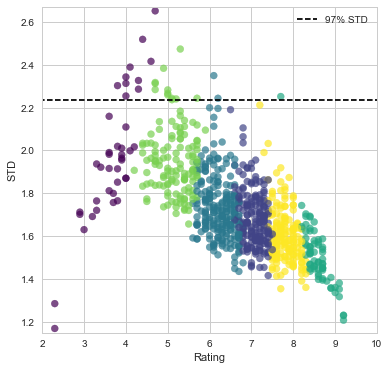

In [30]:
df['cluster'] = kmeans_model.labels_
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df['db_rating'], df['std'], c=df['cluster'], alpha=0.7, cmap='viridis', label='')
plt.plot([0,10],[std_standard, std_standard], linestyle='--', color='black', label='97% STD')
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, '.\clusters.html', show_ratings_num=False, click=True, show_distribution=True)

### 3.3.1 Cross validation of the number of clustering

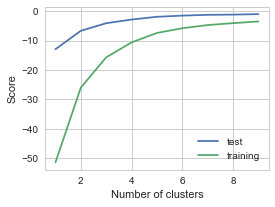

In [31]:
from sklearn.model_selection import GridSearchCV

cluster_range = arange(1,10)
grid = GridSearchCV(KMeans(random_state=1), {'n_clusters': cluster_range}, cv=5, n_jobs=-1) 
grid.fit(X)

plt.plot(cluster_range, grid.cv_results_['mean_test_score'], label='test')
plt.plot(cluster_range, grid.cv_results_['mean_train_score'], label='training')
plt_configure(figsize=(4,3), xlabel='Number of clusters', ylabel='Score', legend=True)

### 3.3.2 Cluster centroids

In [32]:
def prettyfloat(float):
    return "%0.1f" % float

In [33]:
def std_for_distribution(distribution, average):
    std = (distribution[0]*(2-average)**2+distribution[1]*(4-average)**2+distribution[2]*(6-average)**2+\
            distribution[3]*(8-average)**2+distribution[4]*(10-average)**2)**0.5
    return std

In [34]:
vmin, vmax = df['cluster'].min(), df['cluster'].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.get_cmap('viridis')
colors = cmap(norm(arange(vmin, vmax+1)))

In [35]:
x=arange(1,6) # 5 rating types
cluster_rating, cluster_std = [], []
for cluster, color in zip(kmeans_model.cluster_centers_, colors):
    plt.figure()
    rating_avg=np.dot(cluster, arange(2,12,2))
    std = std_for_distribution(cluster, rating_avg)
    plt.bar(x, cluster, alpha=0.7, color=color)
    plt.ylim([0,0.5*1.1])
    cluster_rating.append(rating_avg)
    cluster_std.append(std)
    plt_configure(title='Rating: '+prettyfloat(rating_avg)+', '+prettyfloat(std), figsize=(3.5,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOYAAAC4CAYAAAD37pA8AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEX9JREFUeJzt3X9M1PUfB/AnQqf80JCBrjZ0isgSdYDOxdTQUDQMAWED
pIMSp2amqZk/NhHDEPxRFqBOzVDEQSKRGmr+IF06maKiiEqRIRnjh0JwIJ5wn+8fzPtG/LiD47i3
3POxucndfT7v17k9fR/Hh+eZSJIkgYiE0sfQAxBRawwmkYAYTCIBMZhEAmIwiQTEYBIJiMHshLff
fhtOTk4t/ri6uiIkJAQ3btzQ+jx1dXU4cuSI+us1a9Zg6dKl+hi5TZmZmZg5cybGjh0LPz8/XLhw
od3HyuXyVs/ZyckJnp6eWq+XnZ0Nf39/uLq6YubMmS2ee0cePnwIFxcX1NXVab1WryGR1qZOnSrt
3r1bKi8vl8rLy6WysjIpLy9PCg8PlyZMmCDV1tZqdZ74+HjJ399f/XVNTY30zz//6GvsFi5duiQ5
OztLGRkZ0sOHD6W9e/dKzs7O0u+//97m46uqqtTPt7y8XLpz547k4uIiJScna7XerVu3pFGjRkn7
9++XiouLpR9++EFydnaWTp061eFxJSUlkpeXlzRy5EhJoVB0+nm+7LhjdpKlpSXs7OxgZ2eHQYMG
YezYsYiNjUV1dTVycnK0Oof0n2s6+vfvjwEDBuhj3FYqKiqwePFi+Pv7w97eHvPnz4eFhUW7O761
tbX6+drZ2SEhIQGurq547733tFovMzMTb775Jj744AMMGTIEfn5+8PPzw48//tjuMcePH0dAQADM
zc279Bx7AzNDD9AbyGQyAICpqSkAoL6+Hlu2bMHZs2dRVVUFW1tbhISEYNGiRcjIyEBCQgIAwMnJ
CefOnUNCQgLq6+vxzTffICMjA4cOHcI777yDpKQk1NXVwdPTE9HR0bCwsAAAZGVl4euvv0ZpaSnc
3d1hb28PhUKB2NhY/PXXX/D09MTmzZsxZ86cVrP6+vqq/65UKnH06FE0NDTAzc1N4/O8du0aLly4
0GGo/isoKAgqlarFbSYmJqitrW33mOzsbKxatQr29vYICwvTeq3ehMHU0ZMnT/DFF1/Azs4O48eP
BwBs3rwZt2/fxs6dOzFw4ECcPn0aW7duxVtvvQVvb2/89ttvuHz5Mvbt2wcbG5tW5ywsLMTgwYNx
4MABPHr0CEuXLsWYMWPw/vvv4/r161i1ahU+++wzTJ48GZmZmdizZw/8/PwAAK+99hp+/fVX9O/f
v8O58/LyEBwcDJVKhRUrVmD48OEan+uuXbswc+ZMjBgxQut/n5EjR7b4ury8HD/99BPmz5/f7jFf
fvklAGj9CqQ3YjA7KTY2Ftu3bwcAqFQqNDU1Yfz48fjuu+9gZWUFAHBzc0NwcDCcnZ0BAPPnz0di
YiIKCwsxatQoWFhYwNTUFHZ2dm2u8fz5c0RHR8PW1hYjRozA5MmTcfv2bQBASkoKpk6divDwcADA
ihUrcOXKFfWxHZ333+zt7ZGRkYFr164hLi4OgwcPVoe7LcXFxbh06RLS09O1+Fdqm0KhwEcffQQ7
Ozv1/NQ2BrOTFi5ciNmzZ0OpVOLw4cM4c+YMlixZAkdHR/Vj/Pz8kJ2djWPHjuHBgwe4e/cu6uvr
W72ka4+lpSVsbW3VX1tZWaG+vh4AcP/+ffj4+LR4vIuLC2pqajr1PGxsbGBjY4M33ngDRUVFOHjw
YIfBPHnyJBwcHDB69OhOrfNCVVUVFixYgNLSUqSkpMDS0rJL5zEWfPOnkwYOHIihQ4fC0dERGzZs
wLhx4/Dhhx+itLRU/Zh169YhKioKffv2ha+vL1JTUzv15s4rr7zS7n1mZmZaB7wtN27cwJ07d1rc
5ujoiOrq6g6Pu3DhAqZPn96lNcvKyhAaGorKykqkpKRg6NChXTqPMWEwdbRhwwaYmpoiKioKQPPO
kJGRgbi4OKxYsQKzZs2CTCZDbW2t+t1YExOTLq/n6OjYKlgvXuZq4/Dhw9i2bVuL2/Lz8zv8vrGx
sRH5+fmYMGFC54ZF88vXefPmQalU4tChQwyllhhMHdnY2GDlypX45ZdfcPbsWVhZWcHS0hJnzpxB
SUkJcnNz8fHHH0OSJCiVSgCAhYUFKisrUVJSgsbGxk6tFxYWhuzsbBw8eBB//vknEhIScP36dXXY
m5qaUFFRgYaGhjaPDw0NRU5ODvbu3Yvi4mIkJSXh+PHjWLx4cbvHP3jwAEqlss3walovPj4eJSUl
2LJlC2QyGSoqKlBRUYGqqiqtjjdWDGY3CAwMhKurK2JiYtDY2Ijt27fj8uXLmDVrFlavXo2JEyfC
w8NDvdPNmDEDlpaW8Pb2RkFBQafWGjNmDGJiYpCUlAQfHx8UFBTA09NT/fK3tLQUkyZNQlZWVpvH
u7i4IDExESdOnICPjw/S09OxY8cOuLi4tHt8ZWUlgOafaf6XpvVOnjyJZ8+eISQkBJMmTVL/iYiI
0Op4Y2Ui/fen3SS0W7duwdLSEg4ODurbFixYgLFjx2LJkiUGmWnfvn14/fXX4e3tbZD1eyPumC+Z
mzdvIiIiAlevXsWjR4+QlpaGK1euwMvLyyDzKBQKZGVlwd3d3SDr91bcMV8yjY2N2LZtG06cOIGa
mho4ODhg2bJlmDJlisFmUiqV6qufqHswmEQC4ktZIgExmEQCYjCJBNTj18rm5ub29JJEQhs3blyr
2wxyEXtbg3SX3NxcvZ6/KziTdoxxpvY2Kr6UJRIQg0kkIAaTSEAMJpGAGEwiATGYRAJiMIkEpPHn
mCqVClFRUbh//z5kMhk2bdrUoh4iKSkJR44cUdcwbty4UasqRCJqn8Zgnj17FkqlEmlpabh58yZi
Y2Oxa9cu9f35+fmIi4vrcnsaEbWmMZi5ubmYPHkygOZaivz8/Bb337lzB3v27EFFRQWmTJmChQsX
6mdSIiOiMZgKhUJdZAw0Fwo3NjbCzKz50FmzZmHu3LmwsrLCkiVLkJ2djalTp3Z4Tn1fLyvi9bic
STucqZnGYFpZWbX4GDSVSqUOpSRJCA8PV9fxe3h4oKCgQGMwea2s4XEm7Qh7raybmxsuXrwIoLlv
5t+fRaFQKPDuu++irq4OkiQhJyeH32sSdQONO+b06dNx6dIlBAcHQ5IkxMTE4Pjx46ivr0dQUBCW
L1+OsLAwyGQyuLu7w8PDoyfmJurVNAazT58++Pzzz1vc9u/qxBefd9id1s+O7fKx1dXVyLQ+06Vj
o4+t6fK6RN2JFxgQCYjBJBIQg0kkIAaTSEAMJpGAGEwiATGYRAJiMIkExGASCYjBJBIQg0kkIAaT
SEAMJpGAGEwiATGYRAJiMIkExGASCUhjMFUqFSIjIxEUFAS5XI7i4uI2H7d+/Xps27at2wckMkYa
g/nvwueVK1ciNrZ17UdqaioKCwv1MiCRMdIYTE2Fz9evX0deXh6CgoL0MyGREdKp8Lm8vByJiYlI
SEjAyZMntV5UU4FudXW11ufqzuP1WezLImPtcKZmOhU+nzp1ClVVVViwYAEqKirQ0NCA4cOHY86c
OR2eU1OBbldb7oDmUFpbW3fpWH0V+xpjkXFXGONM7YVeYzDd3NyQnZ0Nb2/vVoXPYWFhCAsLAwBk
ZGTgjz/+0BhKItJM58JnIup+Ohc+v8Cdkqj78AIDIgExmEQCYjCJBMRgEgmIwSQSEINJJCAGk0hA
DCaRgBhMIgExmEQCYjCJBMRgEgmIwSQSEINJJCAGk0hADCaRgHTulT19+jQCAgIQGBiIAwcO6G1Q
ImOiU69sU1MTtm/fjqSkJKSlpeHw4cN48uSJXgcmMgYaq0U66pU1NTVFVlYWzMzM8PjxY6hUKshk
Mv1NS2QkNO6

In [36]:
target_ids = [3,5]

8.18774792961 1.63142077569


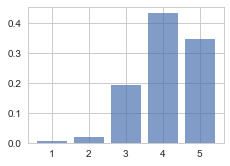

In [37]:
mix_dis = (kmeans_model.cluster_centers_[target_ids[0]] + kmeans_model.cluster_centers_[target_ids[1]])*0.5
rating_avg=np.dot(mix_dis, arange(2,12,2))
std = std_for_distribution(mix_dis, rating_avg)
print(rating_avg, std)
plt.bar(x, mix_dis, alpha=0.7)
plt_configure(figsize=(3.5,2.5))

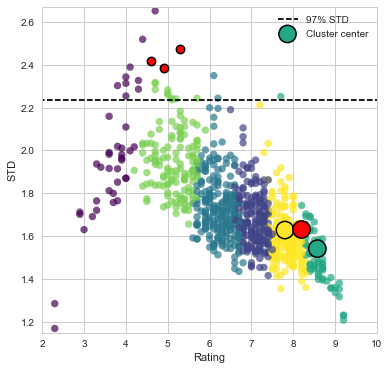

In [38]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df['db_rating'], df['std'], c=df['cluster'], alpha=0.7, cmap='viridis', label='')
ax.scatter([cluster_rating[i] for i in target_ids] , [cluster_std[i] for i in target_ids], 
           color=[colors[i] for i in target_ids], 
            label='Cluster center',
           s=300, edgecolor='black', lw = 1.5)
ax.scatter(rating_avg, std, 
           s=300, facecolor='red', edgecolor='black', lw = 1.5)
sub_df = df[df['name'].str.contains("小团圆|小时代4|长城")] 
ax.scatter(sub_df.db_rating, sub_df['std'], label='',
           s=70, edgecolor='black',facecolor='red', lw=1.5) 
plt.plot([0,10],[std_standard, std_standard], linestyle='--', color='black', label='97% STD')
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)

In [39]:
for cluster in arange(0, n_clusters):
    display(movie_list(df.query('cluster == @cluster').sort_values(by='std',ascending=False), len=4))

## 3.4 Misc analysis

In [40]:
# sub_df = df[df['name'].str.contains("西游")]
# movie_list(sub_df.sort_values(by='std',ascending=False))

In [41]:
df[df['name'].str.contains("大话天仙")]

,1_star,2_star,3_star,4_star,5_star,movie_tt_id,image_url,db_rating,db_ratings_count,name,douban_url,year,mode,std,std2,cluster
1378,0.661,0.231,0.081,0.012,0.015,,https://img3.doubanio.com/view/movie_poster_co...,3.0,23184,大话天仙,https://movie.douban.com/subject/4913222/,2014,2,1.629724,1.900526,0


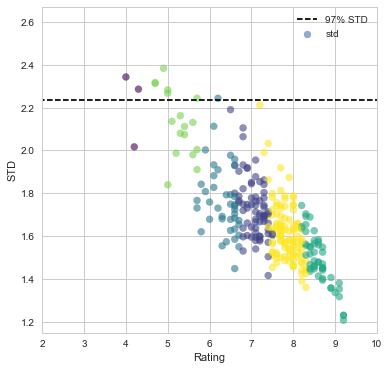

In [42]:
sub_df = df.query("db_ratings_count > 100000")
fig, ax = plt.subplots()
scatter_plot = ax.scatter(sub_df['db_rating'], sub_df['std'], c=sub_df['cluster'], alpha=0.6, cmap='viridis')
plt.plot([0,10],[std_standard, std_standard], linestyle='--', color='black', label='97% STD')
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, sub_df, '.\clusters2.html', show_ratings_num=False, click=True, show_distribution=True)